In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
def read_csv(file):
    return pd.read_csv(file, names=['RESOLUTION', 'CHM', 'CHD', 'IFN', 'IRN', 'OPN', 'SMQ', 'SCOH', 'SCOP', 'CMQ', 'CCOH', 'CCOP', 'SERVICES'])
df = read_csv('aramsoft__aramcomp_22_07_17_46_13_K18.csv')



In [3]:
# Normalize data
df_norm = df.copy()

def normalize(df):
    df_min = df.min()
    df_max = df.max()
    if df_min != df_max: 
        df = df.apply(lambda x : (x - df_min) /(df_max - df_min))
    else:
        df = df.apply(lambda x : 1)
        #print(f"[WARNING] Equal values on normalization")
    return df

def normalize_data(df):
    df['IFN'] = normalize(df['IFN'])
    df['IRN'] = normalize(df['IRN'])
    df['SMQ'] = normalize(df['SMQ'])
    df['CMQ'] = normalize(df['CMQ'])

    return df

    
df_norm = normalize_data(df_norm)


In [4]:
# Adjust values of IFN, IRN, SCOP and CCOP to 1-x, (lower values mean better results) 
def adjust_values(df):
    df['IFN'] = df['IFN'].apply(lambda x: 1-x)
    df['IRN'] = df['IRN'].apply(lambda x: 1-x)
    df['SCOP'] = df['SCOP'].apply(lambda x: 1-x)
    df['CCOP'] = df['CCOP'].apply(lambda x: 1-x)
    return df
df_norm = adjust_values(df_norm)
df_norm

RESOLUTION       CHM       CHD       IFN       IRN    OPN       SMQ  \
0          0.3  0.592658  0.925075  1.000000  0.000000  453.0  0.871056   
1          0.3  0.582251  0.921311  0.956667  0.038462  453.0  0.893926   
2          0.3  0.592658  0.925075  1.000000  0.000000  453.0  0.871056   
3          0.4  0.589916  0.926789  0.911111  0.314103  452.0  0.862997   
4          0.4  0.591632  0.927174  0.911111  0.269231  452.0  0.837045   
5          0.4  0.579084  0.923830  0.863158  0.333333  452.0  0.887407   
6          0.5  0.580023  0.920883  0.812613  0.461538  452.0  1.000000   
7          0.5  0.589466  0.923196  0.812613  0.442308  452.0  0.871275   
8          0.5  0.578020  0.919973  0.759259  0.474359  452.0  0.790982   
9          0.6  0.578737  0.932052  0.643137  0.698718  451.0  0.809027   
10         0.6  0.578987  0.919235  0.702857  0.487179  452.0  0.903020   
11         0.6  0.580833  0.932669  0.702857  0.711538  451.0  0.922794   
12         0.7  0.574858  0.932245  0.512500  0.826923  451.0  0.600050   
13         0.7  0.580427  0.941401  0.512500  0.839744  451.0  0.704167   
14         0.7  0.579951  0.931858  0.512500  0.820513  451.0  0.621454   
15         0.8  0.580427  0.941401  0.512500  0.839744  451.0  0.704167   
16         0.8  0.571228  0.929088  0.440860  0.826923  451.0  0.473901   
17         0.8  0.577337  0.939910  0.440860  0.852564  451.0  0.566269   
18         0.9  0.578633  0.934803  0.282759  0.884615  451.0  0.430431   
19         0.9  0.578759  0.935842  0.282759  0.891026  451.0  0.416213   
20         0.9  0.579476  0.937907  0.364444  0.858974  451.0  0.442179   
21         1.0  0.572291  0.935160  0.195238  0.916667  451.0  0.156420   
22         1.0  0.574935  0.944486  0.364444  1.000000  450.0  0.705035   
23         1.0  0.569147  0.930500  0.000000  0.942308  451.0  0.000000   

        SCOH      SCOP       CMQ      CCOH      CCOP  SERVICES  
0   0.282826  0.989526  0.935758  0.428755  0.999360        44  
1   0.284403  0.989066  0.880079  0.424291  0.999263        43  
2   0.282826  0.989526  0.935758  0.428755  0.999360        44  
3   0.281115  0.990844  0.939131  0.429113  0.999278        42  
4   0.280045  0.990647  0.921583  0.427675  0.999278        42  
5   0.282708  0.990442  1.000000  0.434173  0.999204        41  
6   0.285212  0.993435  0.515002  0.394687  0.998960        38  
7   0.278924  0.993439  0.509127  0.394149  0.999017        38  
8   0.275154  0.993290  0.557874  0.398315  0.998844        36  
9   0.274447  0.994877  0.658704  0.406636  0.998783        35  
10  0.279371  0.994542  0.681230  0.408403  0.998861        36  
11  0.279753  0.995125  0.591475  0.401040  0.998871        36  
12  0.263867  0.995256  0.532970  0.396453  0.998666        33  
13  0.269272  0.994933  0.466370  0.391105  0.998558        33  
14  0.264772  0.995395  0.409986  0.386417  0.998626        33  
15  0.269272  0.994933  0.466370  0.391105  0.998558        33  
16  0.257776  0.995188  0.402888  0.385864  0.998598        32  
17  0.262461  0.995013  0.451552  0.389961  0.998488        32  
18  0.255485  0.995357  0.103579  0.361676  0.998267        30  
19  0.254634  0.995515  0.340931  0.381099  0.998288        30  
20  0.256174  0.995242  0.304756  0.378060  0.998363        31  
21  0.242038  0.995428  0.219951  0.371290  0.998186        29  
22  0.267377  0.996871  0.498281  0.393817  0.998460        31  
23  0.234301  0.995529  0.000000  0.353543  0.997914        27

In [5]:
def calculate_total(df):
    df['TOTAL'] = (df.loc[:,'IFN':'IRN'].sum(axis=1) + df.loc[:,'SMQ'] + df.loc[:,'CMQ'])
    #df['Total'] = (0.1 * df.loc[:,'CHM']) + (0.1 * df.loc[:,'CHD']) + (0.2 * df.loc[:,'IFN']) + (0.2 * df.loc[:,'IRN']) + (0.2 * df.loc[:,'SMQ']) + (0.2 * df.loc[:,'CMQ'])
    #df['Total'] = df.loc[:,'SCOH'] + df.loc[:,'SCOP'] + df.loc[:,'CCOH'] + df.loc[:,'CCOP']
    return df

df_norm = calculate_total(df_norm)
df_norm


RESOLUTION       CHM       CHD       IFN       IRN    OPN       SMQ  \
0          0.3  0.592658  0.925075  1.000000  0.000000  453.0  0.871056   
1          0.3  0.582251  0.921311  0.956667  0.038462  453.0  0.893926   
2          0.3  0.592658  0.925075  1.000000  0.000000  453.0  0.871056   
3          0.4  0.589916  0.926789  0.911111  0.314103  452.0  0.862997   
4          0.4  0.591632  0.927174  0.911111  0.269231  452.0  0.837045   
5          0.4  0.579084  0.923830  0.863158  0.333333  452.0  0.887407   
6          0.5  0.580023  0.920883  0.812613  0.461538  452.0  1.000000   
7          0.5  0.589466  0.923196  0.812613  0.442308  452.0  0.871275   
8          0.5  0.578020  0.919973  0.759259  0.474359  452.0  0.790982   
9          0.6  0.578737  0.932052  0.643137  0.698718  451.0  0.809027   
10         0.6  0.578987  0.919235  0.702857  0.487179  452.0  0.903020   
11         0.6  0.580833  0.932669  0.702857  0.711538  451.0  0.922794   
12         0.7  0.574858  0.932245  0.512500  0.826923  451.0  0.600050   
13         0.7  0.580427  0.941401  0.512500  0.839744  451.0  0.704167   
14         0.7  0.579951  0.931858  0.512500  0.820513  451.0  0.621454   
15         0.8  0.580427  0.941401  0.512500  0.839744  451.0  0.704167   
16         0.8  0.571228  0.929088  0.440860  0.826923  451.0  0.473901   
17         0.8  0.577337  0.939910  0.440860  0.852564  451.0  0.566269   
18         0.9  0.578633  0.934803  0.282759  0.884615  451.0  0.430431   
19         0.9  0.578759  0.935842  0.282759  0.891026  451.0  0.416213   
20         0.9  0.579476  0.937907  0.364444  0.858974  451.0  0.442179   
21         1.0  0.572291  0.935160  0.195238  0.916667  451.0  0.156420   
22         1.0  0.574935  0.944486  0.364444  1.000000  450.0  0.705035   
23         1.0  0.569147  0.930500  0.000000  0.942308  451.0  0.000000   

        SCOH      SCOP       CMQ      CCOH      CCOP  SERVICES     TOTAL  
0   0.282826  0.989526  0.935758  0.428755  0.999360        44  2.806814  
1   0.284403  0.989066  0.880079  0.424291  0.999263        43  2.769133  
2   0.282826  0.989526  0.935758  0.428755  0.999360        44  2.806814  
3   0.281115  0.990844  0.939131  0.429113  0.999278        42  3.027342  
4   0.280045  0.990647  0.921583  0.427675  0.999278        42  2.938970  
5   0.282708  0.990442  1.000000  0.434173  0.999204        41  3.083898  
6   0.285212  0.993435  0.515002  0.394687  0.998960        38  2.789153  
7   0.278924  0.993439  0.509127  0.394149  0.999017        38  2.635322  
8   0.275154  0.993290  0.557874  0.398315  0.998844        36  2.582475  
9   0.274447  0.994877  0.658704  0.406636  0.998783        35  2.809587  
10  0.279371  0.994542  0.681230  0.408403  0.998861        36  2.774287  
11  0.279753  0.995125  0.591475  0.401040  0.998871        36  2.928665  
12  0.263867  0.995256  0.532970  0.396453  0.998666        33  2.472444  
13  0.269272  0.994933  0.466370  0.391105  0.998558        33  2.522780  
14  0.264772  0.995395  0.409986  0.386417  0.998626        33  2.364453  
15  0.269272  0.994933  0.466370  0.391105  0.998558        33  2.522780  
16  0.257776  0.995188  0.402888  0.385864  0.998598        32  2.144572  
17  0.262461  0.995013  0.451552  0.389961  0.998488        32  2.311246  
18  0.255485  0.995357  0.103579  0.361676  0.998267        30  1.701384  
19  0.254634  0.995515  0.340931  0.381099  0.998288        30  1.930928  
20  0.256174  0.995242  0.304756  0.378060  0.998363        31  1.970354  
21  0.242038  0.995428  0.219951  0.371290  0.998186        29  1.488276  
22  0.267377  0.996871  0.498281  0.393817  0.998460        31  2.567761  
23  0.234301  0.995529  0.000000  0.353543  0.997914        27  0.942308

In [6]:
def choose_best_iteration_for_resolution(df_norm):
    best = {}
    drop_indexes = []
    for index, row in df_norm.iterrows():
        res = row['RESOLUTION']
        total = row['TOTAL']

        if res in best:
            if total >= best[res][1]:
                drop_indexes.append(best[res][0])
                best[res] = (index, total)
            else:
                drop_indexes.append(index)
        else:
            best[res] = (index, total)


    df_norm = df_norm.drop(df_norm.index[drop_indexes]).reset_index(drop=True)
    return df_norm

df_norm = choose_best_iteration_for_resolution(df_norm)
df_norm
            
        
        

RESOLUTION       CHM       CHD       IFN       IRN    OPN       SMQ  \
0         0.3  0.592658  0.925075  1.000000  0.000000  453.0  0.871056   
1         0.4  0.579084  0.923830  0.863158  0.333333  452.0  0.887407   
2         0.5  0.580023  0.920883  0.812613  0.461538  452.0  1.000000   
3         0.6  0.580833  0.932669  0.702857  0.711538  451.0  0.922794   
4         0.7  0.580427  0.941401  0.512500  0.839744  451.0  0.704167   
5         0.8  0.580427  0.941401  0.512500  0.839744  451.0  0.704167   
6         0.9  0.579476  0.937907  0.364444  0.858974  451.0  0.442179   
7         1.0  0.574935  0.944486  0.364444  1.000000  450.0  0.705035   

       SCOH      SCOP       CMQ      CCOH      CCOP  SERVICES     TOTAL  
0  0.282826  0.989526  0.935758  0.428755  0.999360        44  2.806814  
1  0.282708  0.990442  1.000000  0.434173  0.999204        41  3.083898  
2  0.285212  0.993435  0.515002  0.394687  0.998960        38  2.789153  
3  0.279753  0.995125  0.591475  0.401040  0.998871        36  2.928665  
4  0.269272  0.994933  0.466370  0.391105  0.998558        33  2.522780  
5  0.269272  0.994933  0.466370  0.391105  0.998558        33  2.522780  
6  0.256174  0.995242  0.304756  0.378060  0.998363        31  1.970354  
7  0.267377  0.996871  0.498281  0.393817  0.998460        31  2.567761

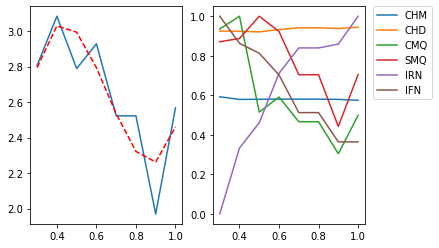

In [7]:
def plot(df_norm):
    x = df_norm['RESOLUTION']
    y = df_norm['TOTAL']
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    
    ax1.plot(x,y)
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    ax1.plot(x,p(x),'r--')
    
    
    ax2.plot(x, df_norm['CHM'], label='CHM')
    ax2.plot(x, df_norm['CHD'], label='CHD')
    ax2.plot(x, df_norm['CMQ'], label='CMQ')
    ax2.plot(x, df_norm['SMQ'], label='SMQ')
    ax2.plot(x, df_norm['IRN'], label='IRN')
    ax2.plot(x, df_norm['IFN'], label='IFN')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

plot(df_norm)




Metrics for kai8406__cmop
Total classes: 237
Total controllers: 34
Open issues : 1
Stars : 17


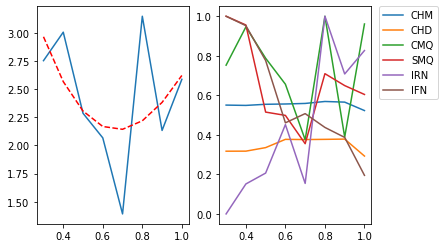

Max val resolution: 0.8



Metrics for chenzhq__WsMonitor
Total classes: 246
Total controllers: 16
Open issues : 8
Stars : 4


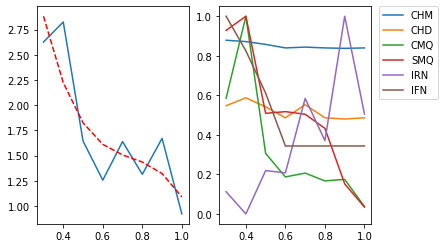

Max val resolution: 0.4



Metrics for sfx478076717__goldenarches
Total classes: 56
Total controllers: 11
Open issues : 0
Stars : 4


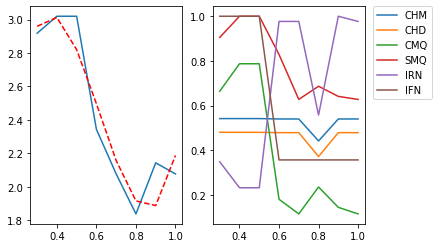

Max val resolution: 0.4



Metrics for forwardNow__javaee_pkui
Total classes: 253
Total controllers: 35
Open issues : 0
Stars : 3


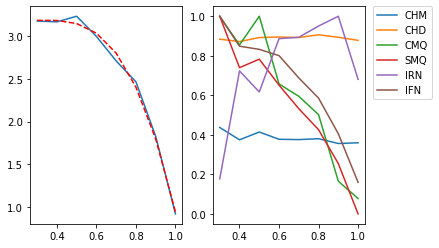

Max val resolution: 0.5



Metrics for YouAreOnlyOne__CommunityInformationForWeb
Total classes: 163
Total controllers: 23
Open issues : 0
Stars : 2


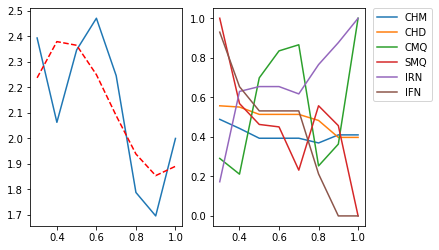

Max val resolution: 0.6



Metrics for SafeExamBrowser__seb-server
Total classes: 680
Total controllers: 46
Open issues : 0
Stars : 5


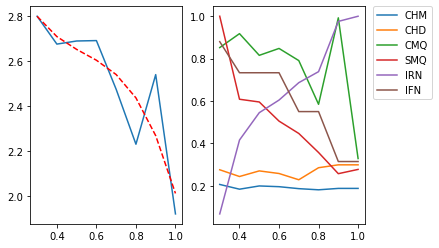

Max val resolution: 0.3



Metrics for leluque__university-site-cms
Total classes: 254
Total controllers: 23
Open issues : 9
Stars : 21


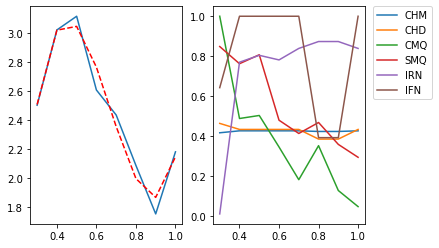

Max val resolution: 0.5



Metrics for ZFGCCP__ZFGC3
Total classes: 471
Total controllers: 26
Open issues : 34
Stars : 4


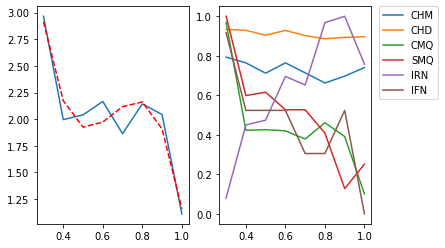

Max val resolution: 0.3



Metrics for OpenGeoportal__OGP2
Total classes: 330
Total controllers: 24
Open issues : 11
Stars : 18


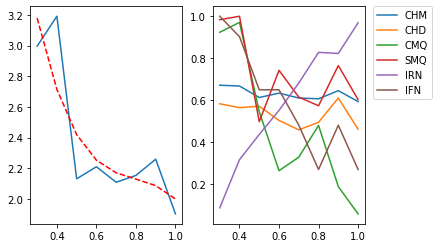

Max val resolution: 0.4



Metrics for AtlasOfLivingAustralia__biocache-service
Total classes: 151
Total controllers: 23
Open issues : 147
Stars : 3


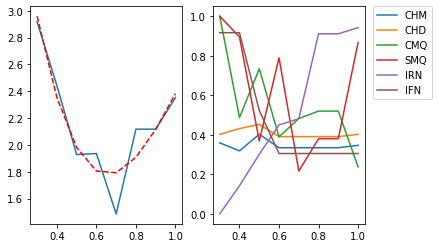

Max val resolution: 0.3



Metrics for choerodon__agile-service-old
Total classes: 914
Total controllers: 98
Open issues : 1
Stars : 17


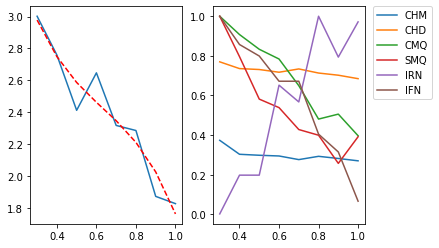

Max val resolution: 0.3



Metrics for iminto__baicai
Total classes: 84
Total controllers: 12
Open issues : 0
Stars : 41


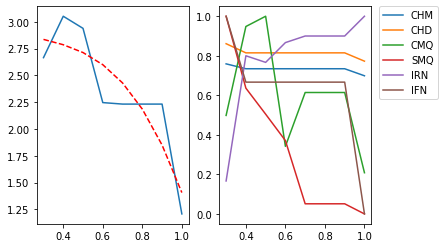

Max val resolution: 0.4



Metrics for busing__circle_web
Total classes: 268
Total controllers: 19
Open issues : 0
Stars : 8


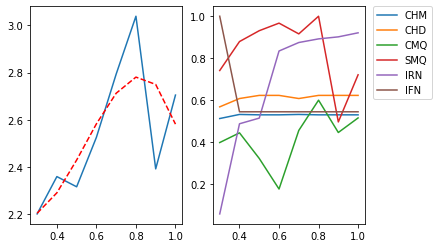

Max val resolution: 0.8



Metrics for GdeiAssistant__GdeiAssistant
Total classes: 455
Total controllers: 84
Open issues : 0
Stars : 79


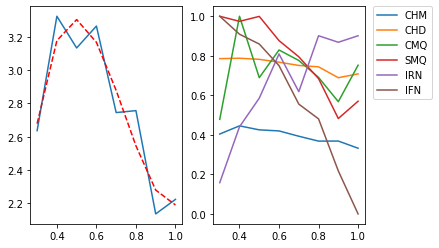

Max val resolution: 0.4



Metrics for LiJiuRi__jie_you_ba
Total classes: 102
Total controllers: 18
Open issues : 0
Stars : 3


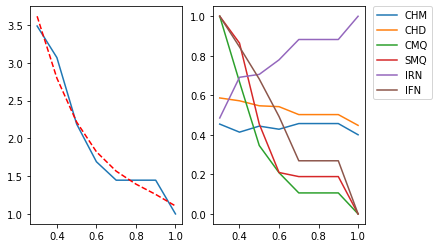

Max val resolution: 0.3



Metrics for starqiu__RDMP1
Total classes: 60
Total controllers: 30
Open issues : 0
Stars : 10


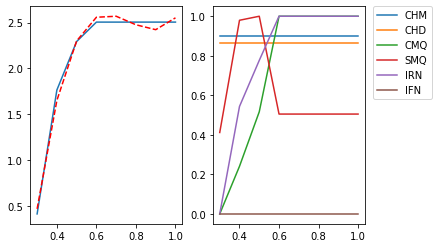

Max val resolution: 0.6



Metrics for ssolutiondev__ssolution
Total classes: 164
Total controllers: 19
Open issues : 0
Stars : 2


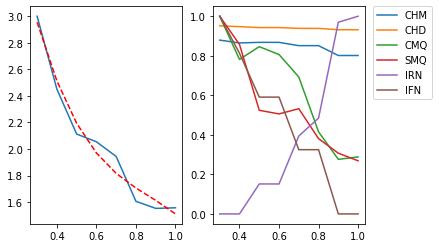

Max val resolution: 0.3



Metrics for Ganweizhi__Ruanzhuo2
Total classes: 142
Total controllers: 23
Open issues : 1
Stars : 2


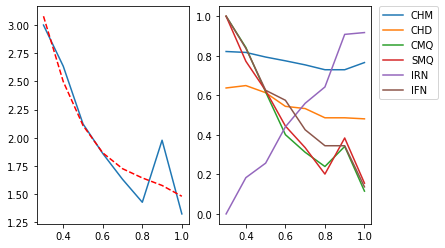

Max val resolution: 0.3



Metrics for skyisbule__nanfeng
Total classes: 71
Total controllers: 13
Open issues : 2
Stars : 4


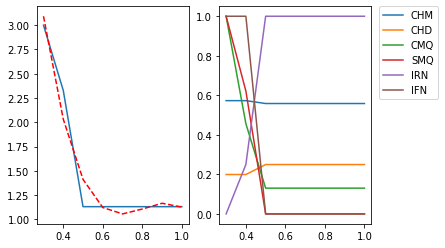

Max val resolution: 0.3



Metrics for mingslife__LightCMS
Total classes: 103
Total controllers: 17
Open issues : 0
Stars : 4


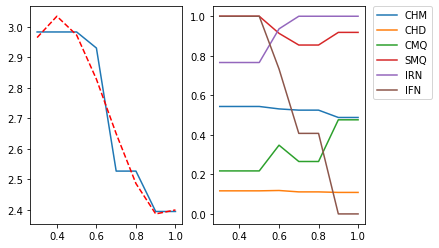

Max val resolution: 0.3



Metrics for parasoft__parabank
Total classes: 260
Total controllers: 71
Open issues : 1
Stars : 10


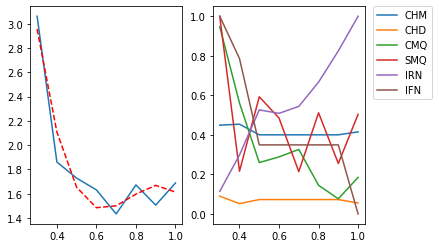

Max val resolution: 0.3



Metrics for assertmyself__gweb-v2
Total classes: 365
Total controllers: 33
Open issues : 0
Stars : 2


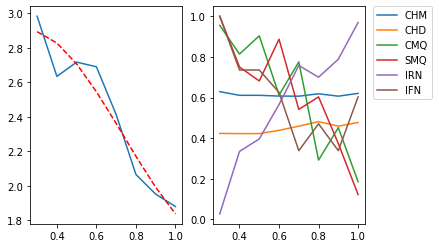

Max val resolution: 0.3



Metrics for litblank__hammer
Total classes: 226
Total controllers: 24
Open issues : 0
Stars : 18


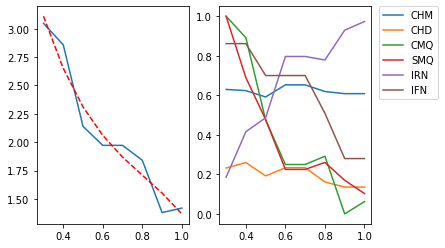

Max val resolution: 0.3



Metrics for 75193982__HyLMS
Total classes: 535
Total controllers: 141
Open issues : 0
Stars : 4


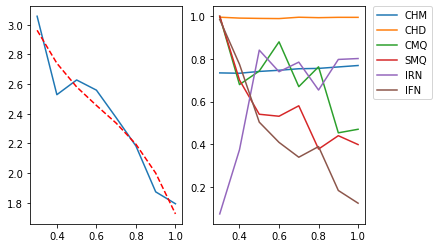

Max val resolution: 0.3



Metrics for bbaibb1009__wxcrm
Total classes: 95
Total controllers: 15
Open issues : 1
Stars : 7


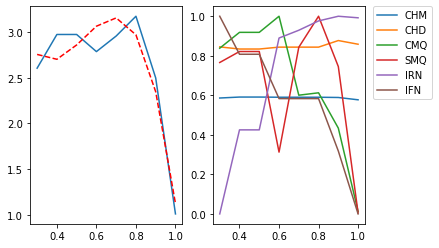

Max val resolution: 0.8



Metrics for shenshaoming__byte_easy
Total classes: 55
Total controllers: 12
Open issues : 0
Stars : 5


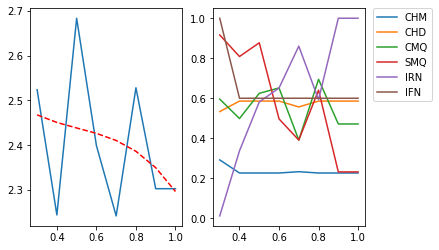

Max val resolution: 0.5



Metrics for liudexiang3218__CMSLite
Total classes: 221
Total controllers: 13
Open issues : 2
Stars : 2


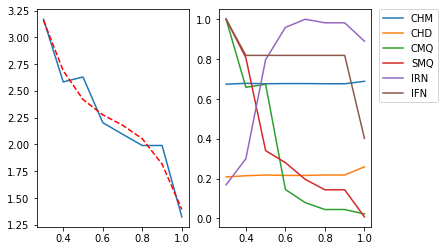

Max val resolution: 0.3



Metrics for dtdhehe__ptu-life
Total classes: 66
Total controllers: 12
Open issues : 0
Stars : 2


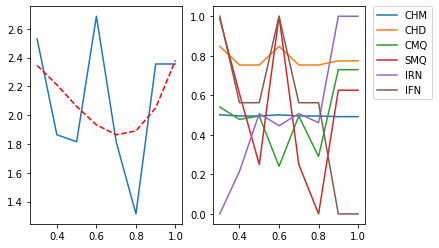

Max val resolution: 0.6



Metrics for Lotharing__SDIMS
Total classes: 112
Total controllers: 20
Open issues : 6
Stars : 34


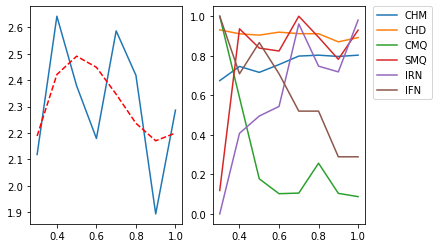

Max val resolution: 0.4



Metrics for Frodez__BlogManagePlatform
Total classes: 317
Total controllers: 15
Open issues : 0
Stars : 33


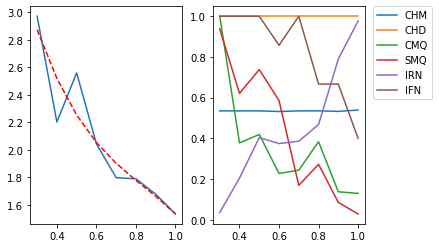

Max val resolution: 0.3



Metrics for cym1102__nginxWebUI
Total classes: 82
Total controllers: 18
Open issues : 0
Stars : 39


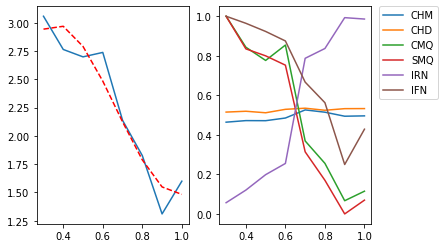

Max val resolution: 0.3



Metrics for forTribeforXuanmo__sword-forum
Total classes: 79
Total controllers: 12
Open issues : 4
Stars : 57


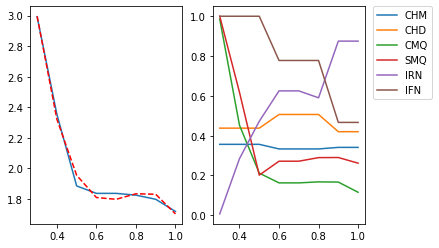

Max val resolution: 0.3



Metrics for linolee__class4
Total classes: 187
Total controllers: 24
Open issues : 4
Stars : 4


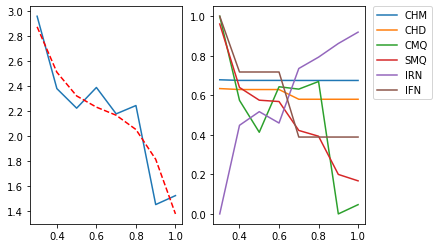

Max val resolution: 0.3



Metrics for kanban__kanban-app
Total classes: 140
Total controllers: 12
Open issues : 5
Stars : 34


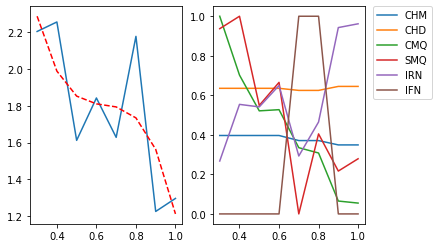

Max val resolution: 0.4



Metrics for kingslayer15__mutual
Total classes: 170
Total controllers: 23
Open issues : 3
Stars : 3


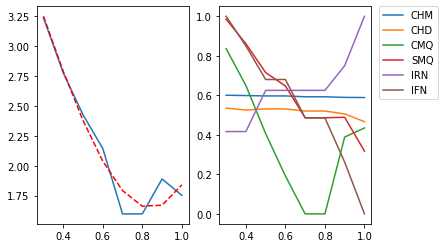

Max val resolution: 0.3



Metrics for thinksgroup__Niceschool
Total classes: 165
Total controllers: 26
Open issues : 1
Stars : 3


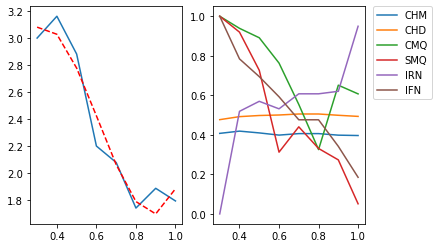

Max val resolution: 0.4



Metrics for racem-cherni__KinderGartenProject
Total classes: 209
Total controllers: 57
Open issues : 0
Stars : 3


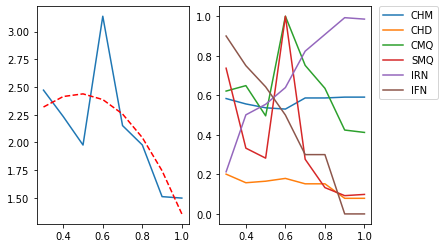

Max val resolution: 0.6



Metrics for jeezhau__ec-server
Total classes: 149
Total controllers: 20
Open issues : 0
Stars : 2


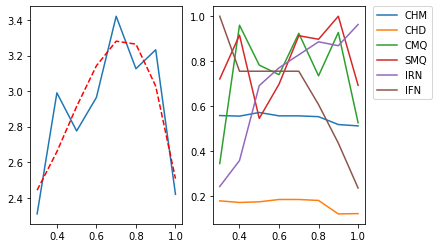

Max val resolution: 0.7



Metrics for xabaohui__zis
Total classes: 553
Total controllers: 135
Open issues : 24
Stars : 2


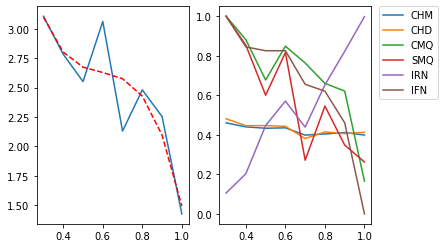

Max val resolution: 0.3



Metrics for CeaMYHBK__AppCeaM
Total classes: 35
Total controllers: 12
Open issues : 0
Stars : 2


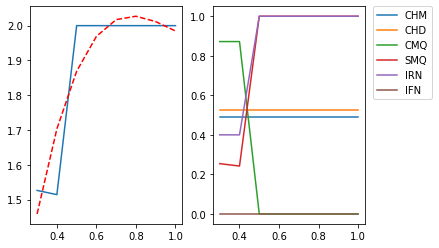

Max val resolution: 0.5



Metrics for nds1993__OpenMPS
Total classes: 922
Total controllers: 141
Open issues : 0
Stars : 3


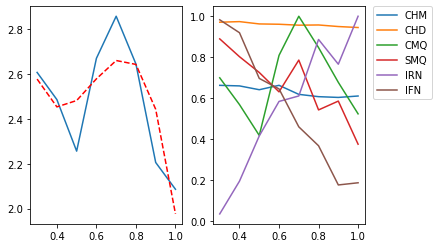

Max val resolution: 0.7



Metrics for Glamdring__welshare
Total classes: 241
Total controllers: 33
Open issues : 0
Stars : 4


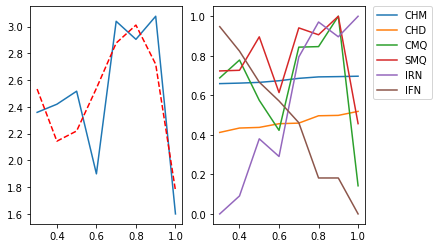

Max val resolution: 0.9



Metrics for Propro-Studio__propro-server
Total classes: 310
Total controllers: 21
Open issues : 2
Stars : 10


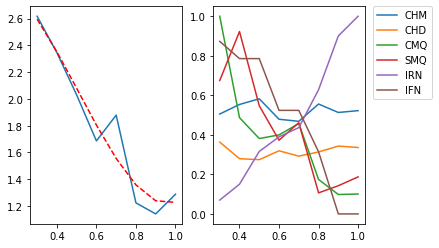

Max val resolution: 0.3



Metrics for BCSquad__pmph
Total classes: 953
Total controllers: 87
Open issues : 14
Stars : 10


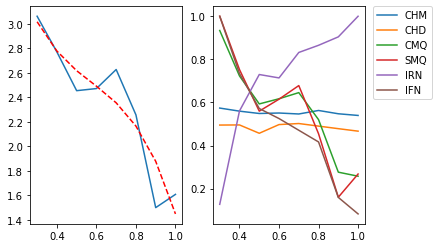

Max val resolution: 0.3



Metrics for WilsonHu__sinsim
Total classes: 243
Total controllers: 42
Open issues : 2
Stars : 4


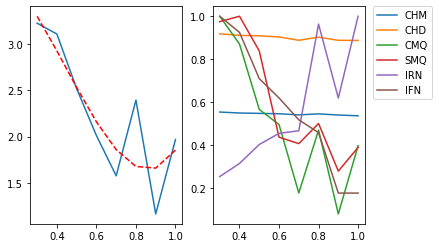

Max val resolution: 0.3



Metrics for dovier__coj-web
Total classes: 453
Total controllers: 62
Open issues : 2
Stars : 4


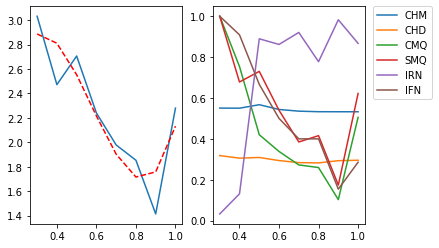

Max val resolution: 0.3



Metrics for cdcchain__cdc-browser
Total classes: 58
Total controllers: 15
Open issues : 0
Stars : 3


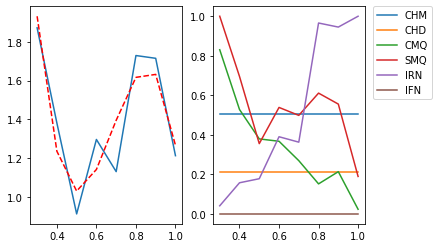

Max val resolution: 0.3



Metrics for VN-Lf__GitNo3
Total classes: 126
Total controllers: 25
Open issues : 0
Stars : 2


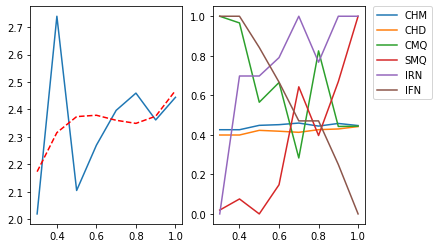

Max val resolution: 0.4



Metrics for xiongzhenhai-zh__produce-project-managerment
Total classes: 113
Total controllers: 14
Open issues : 0
Stars : 3


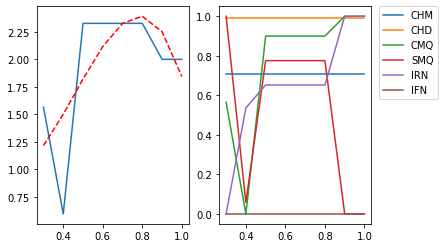

Max val resolution: 0.5



Metrics for loongw513029__buscloud
Total classes: 347
Total controllers: 40
Open issues : 0
Stars : 4


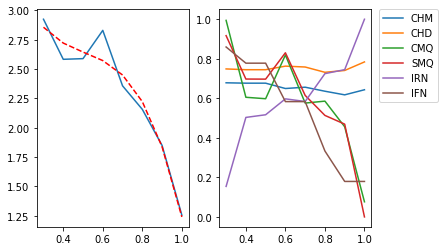

Max val resolution: 0.3



Metrics for XMFBee__AuthPlatform1
Total classes: 281
Total controllers: 63
Open issues : 0
Stars : 3


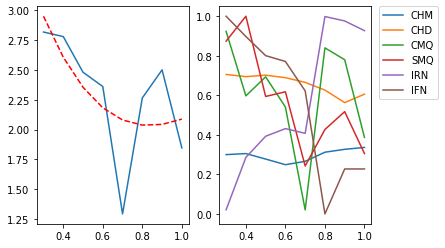

Max val resolution: 0.3



Metrics for shigenwang__membership
Total classes: 153
Total controllers: 18
Open issues : 0
Stars : 5


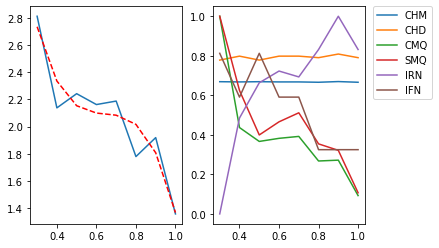

Max val resolution: 0.3



Metrics for miansen__Roothub
Total classes: 389
Total controllers: 33
Open issues : 16
Stars : 100


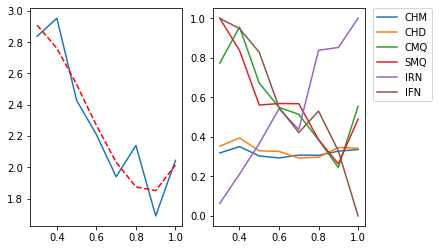

Max val resolution: 0.4



Metrics for zhangyanbo2007__youkefu
Total classes: 830
Total controllers: 99
Open issues : 0
Stars : 10


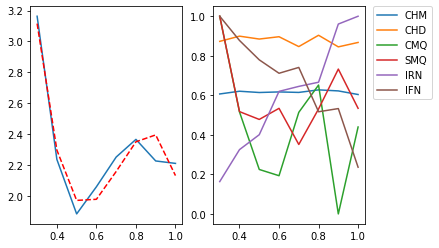

Max val resolution: 0.3



Metrics for Russel-JX__OUC-Family
Total classes: 276
Total controllers: 23
Open issues : 0
Stars : 2


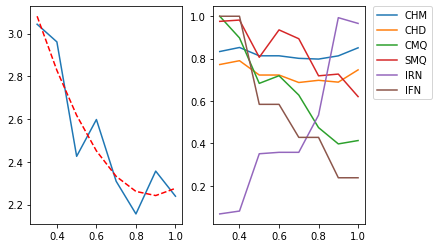

Max val resolution: 0.3



Metrics for GraffiTab__GraffiTab-Backend
Total classes: 188
Total controllers: 11
Open issues : 42
Stars : 5


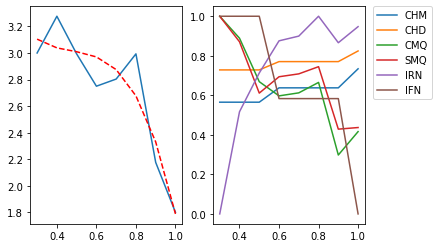

Max val resolution: 0.4



Metrics for muralibasani__kafkawize
Total classes: 99
Total controllers: 27
Open issues : 0
Stars : 70


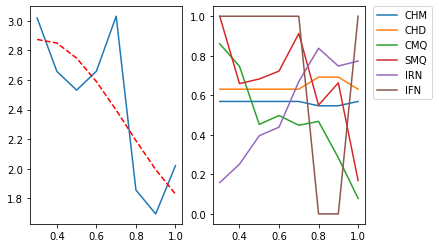

Max val resolution: 0.7



Metrics for ghostxbh__uzy-ssm-mall
Total classes: 89
Total controllers: 19
Open issues : 0
Stars : 19


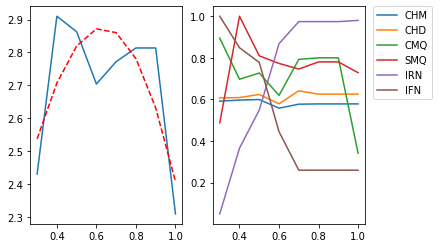

Max val resolution: 0.4



Metrics for yunchaoyun__active4j-oa
Total classes: 436
Total controllers: 78
Open issues : 1
Stars : 3


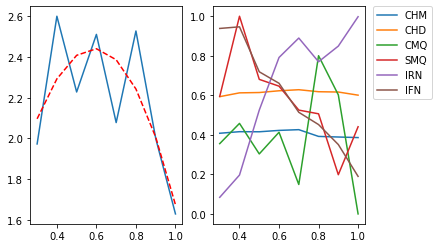

Max val resolution: 0.4



Metrics for peonycmsTeam__peonytancms
Total classes: 280
Total controllers: 29
Open issues : 0
Stars : 3


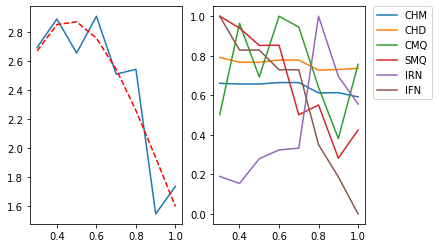

Max val resolution: 0.6



Metrics for softservedata__lv257
Total classes: 171
Total controllers: 18
Open issues : 2
Stars : 5


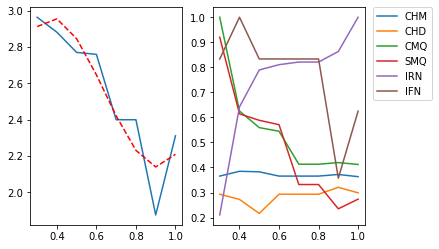

Max val resolution: 0.3



Metrics for tangdu__smh2
Total classes: 111
Total controllers: 25
Open issues : 0
Stars : 27


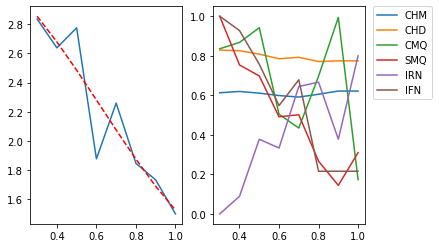

Max val resolution: 0.3



Metrics for RMHM__miniMap
Total classes: 83
Total controllers: 12
Open issues : 0
Stars : 3


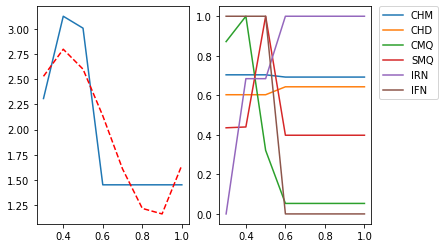

Max val resolution: 0.4



Metrics for smartcommunitylab__smartcampus.vas.corsi.web
Total classes: 65
Total controllers: 13
Open issues : 0
Stars : 3


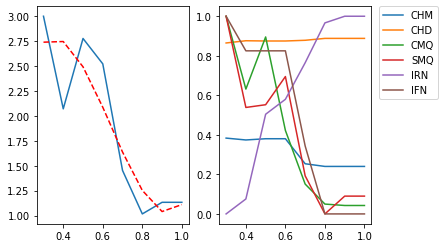

Max val resolution: 0.3



Metrics for Vino007__javaEEScaffold
Total classes: 45
Total controllers: 21
Open issues : 2
Stars : 84


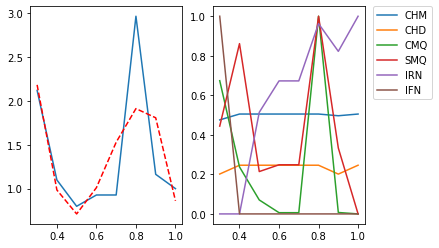

Max val resolution: 0.8



Metrics for GreaterLondonAuthority__GLA-OPS
Total classes: 625
Total controllers: 11
Open issues : 0
Stars : 2


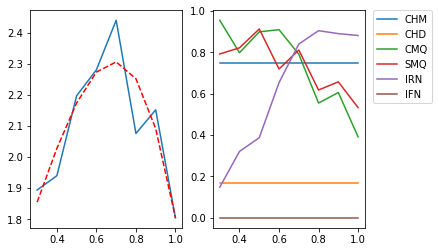

Max val resolution: 0.7



Metrics for Lewage59__design2019
Total classes: 33
Total controllers: 12
Open issues : 0
Stars : 2


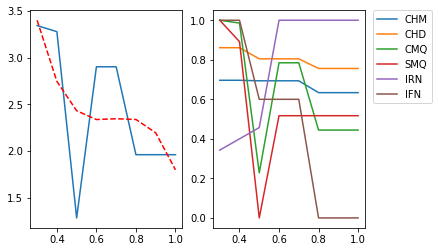

Max val resolution: 0.3



Metrics for holagoldfish__H5APP-java
Total classes: 39
Total controllers: 15
Open issues : 0
Stars : 3


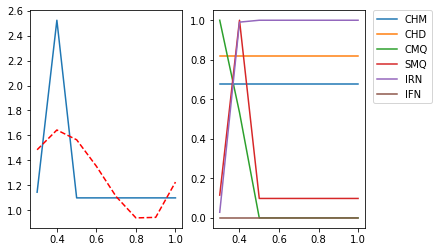

Max val resolution: 0.4



Metrics for tlkzzz__xpjfx
Total classes: 478
Total controllers: 120
Open issues : 0
Stars : 3


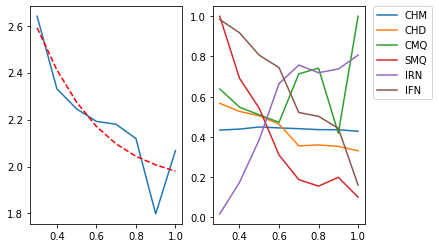

Max val resolution: 0.3



Metrics for kimki1124__MetelSOS
Total classes: 61
Total controllers: 11
Open issues : 0
Stars : 3


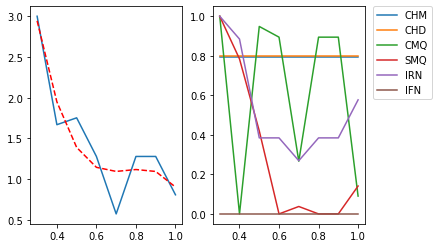

Max val resolution: 0.3



Metrics for zndo__oss-admin-parent
Total classes: 106
Total controllers: 32
Open issues : 0
Stars : 4


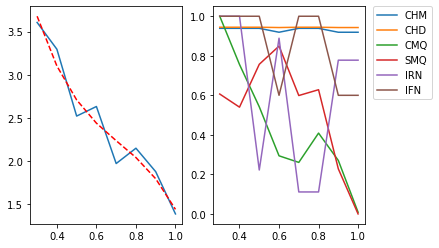

Max val resolution: 0.3



Metrics for okfarm09__JYLAND
Total classes: 68
Total controllers: 15
Open issues : 0
Stars : 3


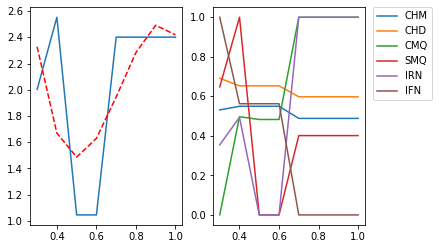

Max val resolution: 0.4



Metrics for Jeanwin__disrec
Total classes: 333
Total controllers: 53
Open issues : 0
Stars : 2


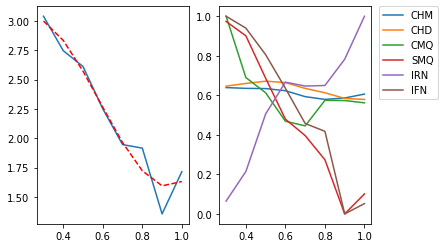

Max val resolution: 0.3



Metrics for OCR4all__OCR4all
Total classes: 47
Total controllers: 18
Open issues : 13
Stars : 86


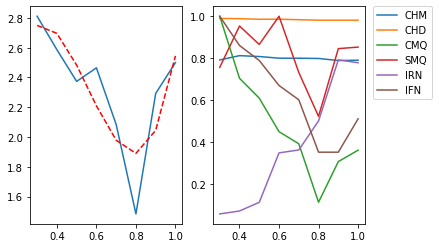

Max val resolution: 0.3



Metrics for choerodon__agile-service
Total classes: 815
Total controllers: 81
Open issues : 0
Stars : 3


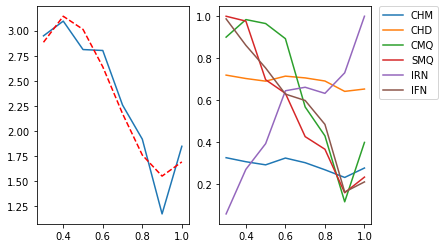

Max val resolution: 0.4



Metrics for gliderwiki__glider
Total classes: 329
Total controllers: 32
Open issues : 2
Stars : 15


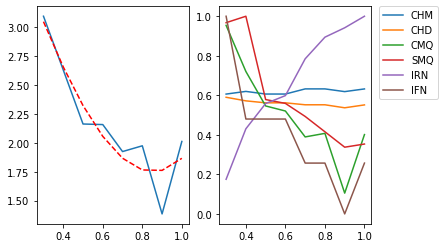

Max val resolution: 0.3



Metrics for HUTchengxi__Tutor
Total classes: 169
Total controllers: 17
Open issues : 0
Stars : 2


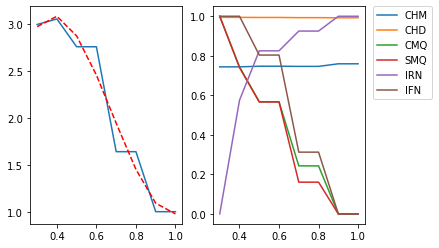

Max val resolution: 0.4



Metrics for litbo__hospitalzj
Total classes: 185
Total controllers: 26
Open issues : 0
Stars : 2


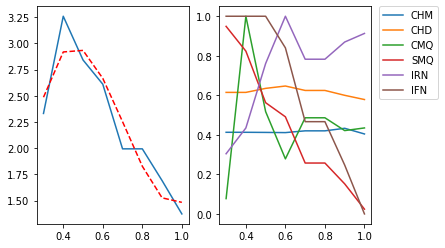

Max val resolution: 0.4



Metrics for Rocklee830630__WMSystem
Total classes: 816
Total controllers: 204
Open issues : 0
Stars : 4


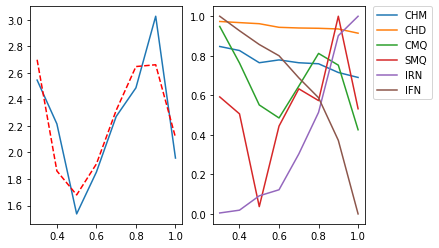

Max val resolution: 0.9



Metrics for superman544__JavaOJSystem
Total classes: 192
Total controllers: 20
Open issues : 2
Stars : 47


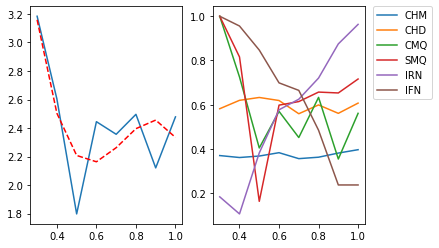

Max val resolution: 0.3



Metrics for huanglu20124__invoice
Total classes: 73
Total controllers: 12
Open issues : 2
Stars : 95


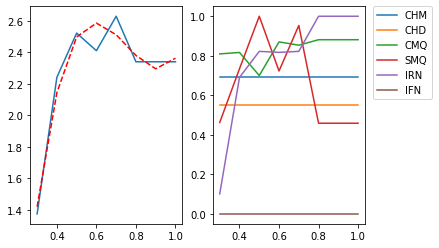

Max val resolution: 0.7



Metrics for yShen868__ssm03
Total classes: 94
Total controllers: 14
Open issues : 5
Stars : 4


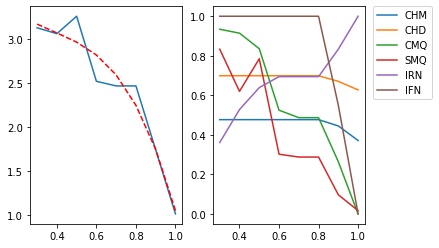

Max val resolution: 0.5



Metrics for zxwgdft__paladin-boot
Total classes: 328
Total controllers: 17
Open issues : 0
Stars : 6


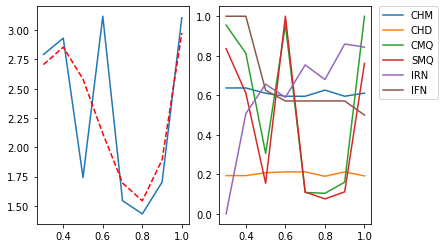

Max val resolution: 0.6



Metrics for 598605338__yikao
Total classes: 607
Total controllers: 37
Open issues : 0
Stars : 2


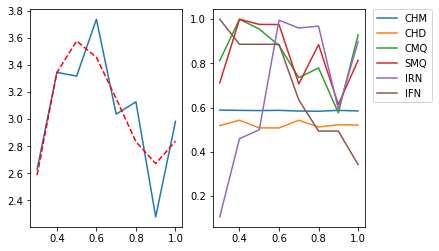

Max val resolution: 0.6



Metrics for zhaowei520__CDCXH
Total classes: 236
Total controllers: 33
Open issues : 1
Stars : 2


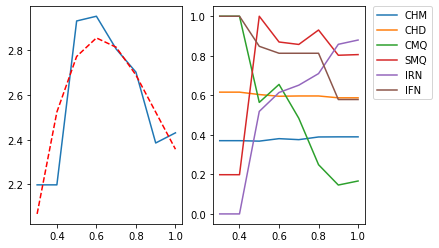

Max val resolution: 0.6



Metrics for JoeyBling__bootplus
Total classes: 150
Total controllers: 13
Open issues : 0
Stars : 58


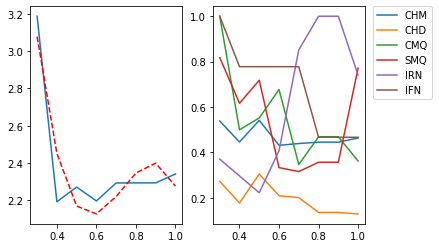

Max val resolution: 0.3



Metrics for wangwang1230__te-empl
Total classes: 156
Total controllers: 24
Open issues : 0
Stars : 4


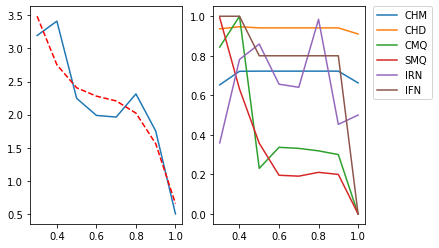

Max val resolution: 0.4



Metrics for bao17634__Warehouse-system
Total classes: 76
Total controllers: 13
Open issues : 1
Stars : 5


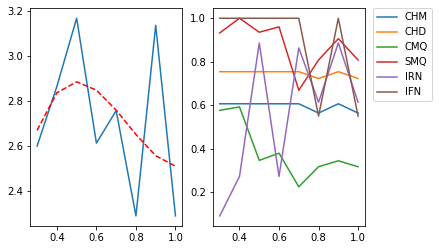

Max val resolution: 0.5



Metrics for hyperaeon__CrazyAndOptimize
Total classes: 1390
Total controllers: 26
Open issues : 2
Stars : 2


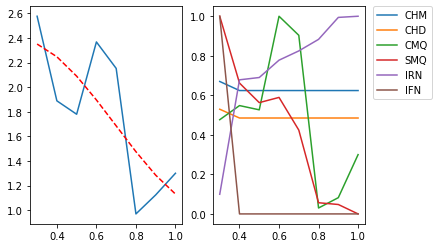

Max val resolution: 0.3



Metrics for doooyo__Weixin_Server
Total classes: 303
Total controllers: 32
Open issues : 0
Stars : 13


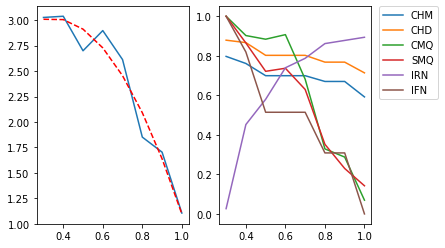

Max val resolution: 0.4



Metrics for 768330962__poet_ready_system
Total classes: 57
Total controllers: 14
Open issues : 3
Stars : 8


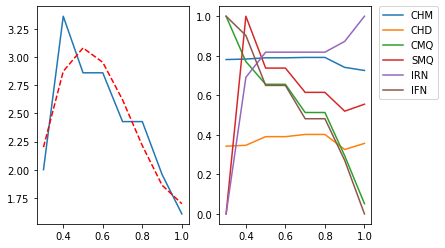

Max val resolution: 0.4



Metrics for HIIT__dime-server
Total classes: 91
Total controllers: 12
Open issues : 23
Stars : 13


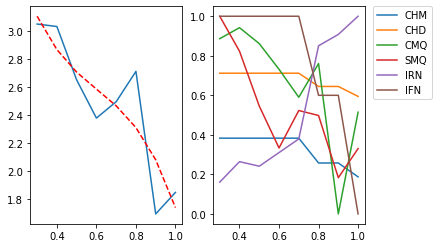

Max val resolution: 0.3



Metrics for mozammel__mNet
Total classes: 148
Total controllers: 21
Open issues : 3
Stars : 15


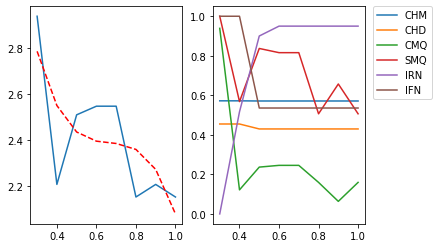

Max val resolution: 0.3



Metrics for heaptrip__heaptrip
Total classes: 483
Total controllers: 11
Open issues : 83
Stars : 2


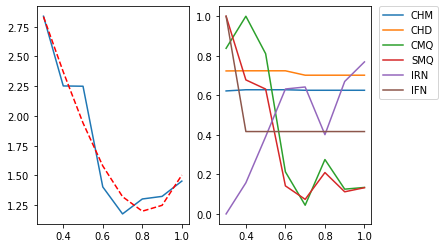

Max val resolution: 0.3



Metrics for moocss__EasyCMS
Total classes: 64
Total controllers: 12
Open issues : 0
Stars : 86


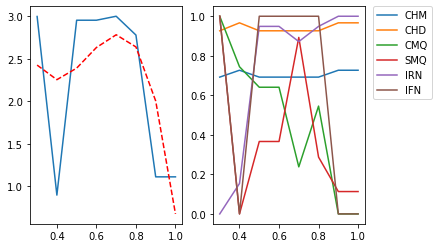

Max val resolution: 0.7



Metrics for next-step__jwp-jdbc
Total classes: 117
Total controllers: 16
Open issues : 1
Stars : 4


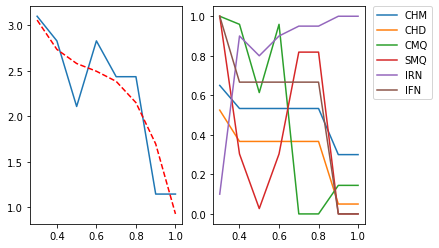

Max val resolution: 0.3



Metrics for EUSurvey__EUSURVEY
Total classes: 294
Total controllers: 46
Open issues : 11
Stars : 8


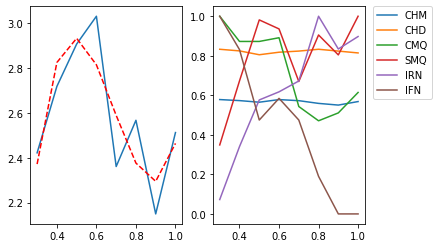

Max val resolution: 0.6



Metrics for wh4585hai__OnlineSchool
Total classes: 259
Total controllers: 26
Open issues : 0
Stars : 3


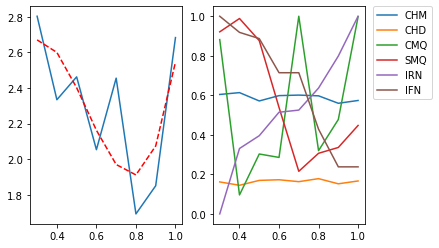

Max val resolution: 0.3



Metrics for AaronSum__hotel-mgr-sys
Total classes: 498
Total controllers: 31
Open issues : 0
Stars : 2


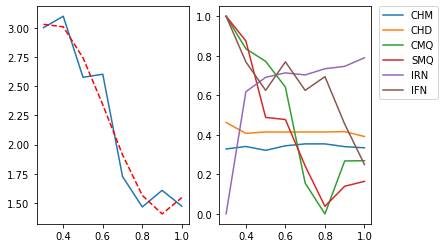

Max val resolution: 0.4



Metrics for gvSIGAssociation__gvsig-web
Total classes: 127
Total controllers: 51
Open issues : 0
Stars : 2


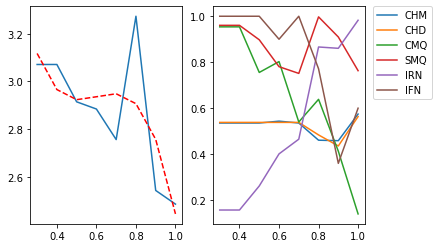

Max val resolution: 0.8



Metrics for pibigstar__parsevip
Total classes: 90
Total controllers: 17
Open issues : 0
Stars : 87


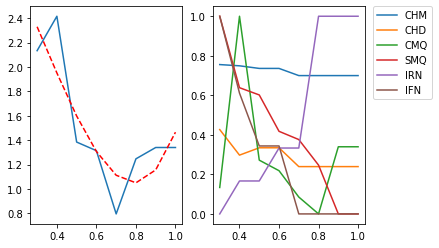

Max val resolution: 0.4



Metrics for immime__shop-2
Total classes: 292
Total controllers: 59
Open issues : 0
Stars : 2


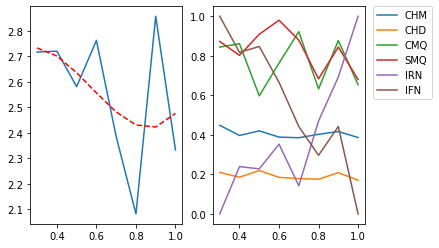

Max val resolution: 0.9



Metrics for tanzhb__zhgj-project
Total classes: 508
Total controllers: 75
Open issues : 1
Stars : 3


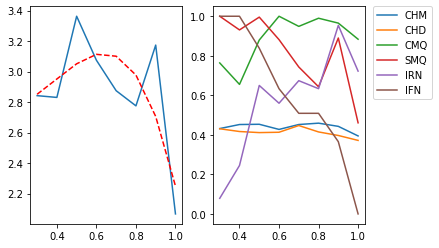

Max val resolution: 0.5



Metrics for qiao-zhi__jwxt
Total classes: 595
Total controllers: 76
Open issues : 2
Stars : 26


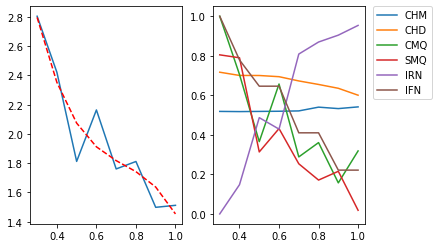

Max val resolution: 0.3



Metrics for jdmr__mateo
Total classes: 704
Total controllers: 149
Open issues : 3
Stars : 23


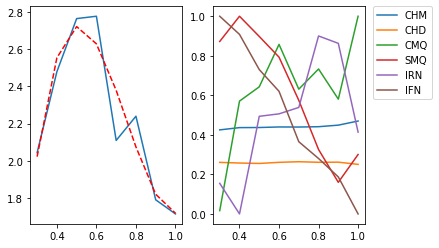

Max val resolution: 0.6



Metrics for opendevstack__ods-provisioning-app
Total classes: 146
Total controllers: 11
Open issues : 47
Stars : 11


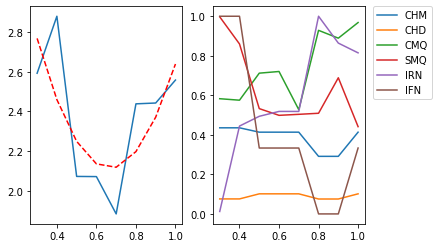

Max val resolution: 0.4



Metrics for TexnologiaLogismikou__Fiz
Total classes: 199
Total controllers: 18
Open issues : 3
Stars : 6


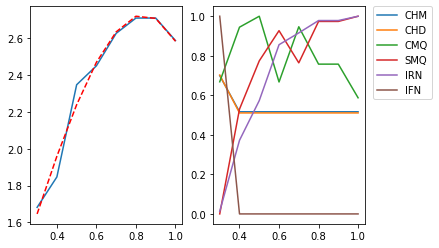

Max val resolution: 0.8



Metrics for amit-an__webapp_war_sample
Total classes: 334
Total controllers: 105
Open issues : 0
Stars : 2


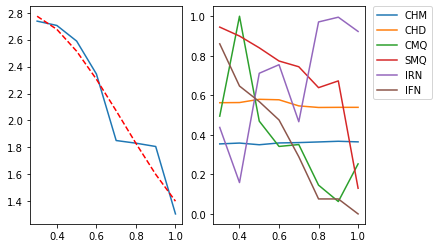

Max val resolution: 0.3



Metrics for kinorsi__mykided-api
Total classes: 710
Total controllers: 34
Open issues : 0
Stars : 2


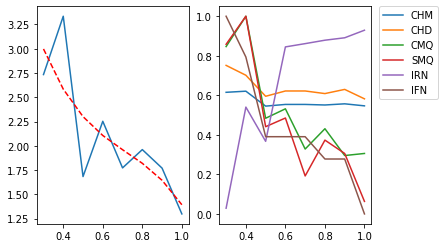

Max val resolution: 0.4



Metrics for superman7__AccountManagement
Total classes: 67
Total controllers: 15
Open issues : 0
Stars : 2


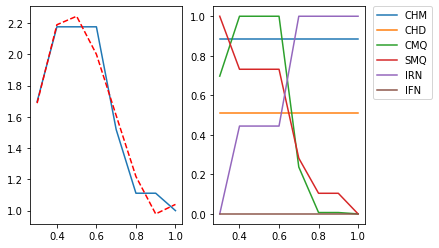

Max val resolution: 0.4



Metrics for Prasad108__TutesMessanger
Total classes: 109
Total controllers: 20
Open issues : 18
Stars : 8


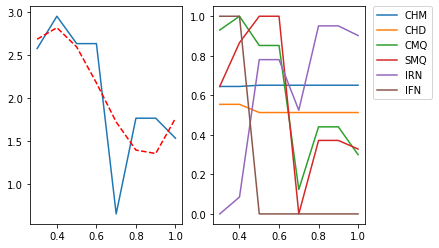

Max val resolution: 0.4



Metrics for tcrct__duang
Total classes: 377
Total controllers: 12
Open issues : 2
Stars : 4


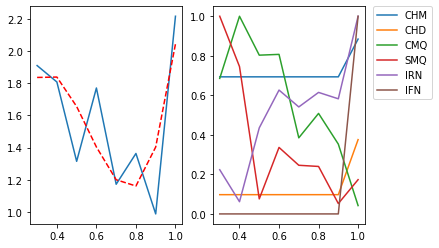

Max val resolution: 1.0



Metrics for easy-ware__api-manager
Total classes: 181
Total controllers: 90
Open issues : 5
Stars : 15


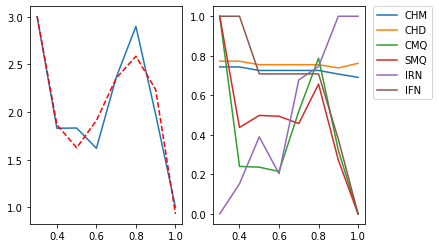

Max val resolution: 0.3



Metrics for simbest__simbest-cores
Total classes: 401
Total controllers: 28
Open issues : 0
Stars : 5


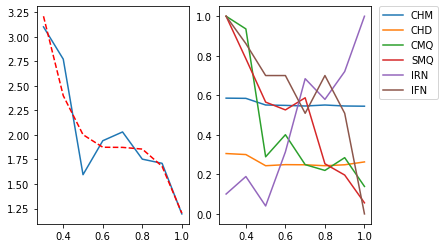

Max val resolution: 0.3



Metrics for Seenck__jeecg-bpm-3.8
Total classes: 810
Total controllers: 128
Open issues : 2
Stars : 5


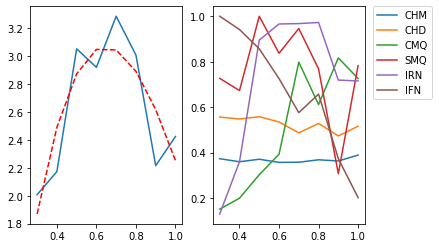

Max val resolution: 0.7



Metrics for UDA-EJIE__udaLib
Total classes: 320
Total controllers: 13
Open issues : 3
Stars : 7


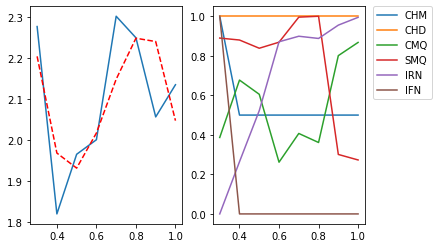

Max val resolution: 0.7



Metrics for yaowuya__lprapm
Total classes: 105
Total controllers: 26
Open issues : 1
Stars : 4


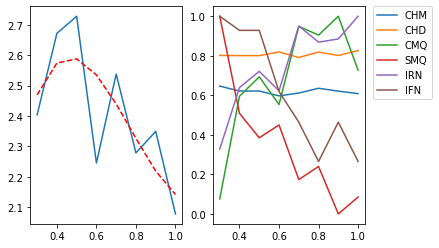

Max val resolution: 0.5



Metrics for nullcodeexecutor__pts
Total classes: 174
Total controllers: 27
Open issues : 0
Stars : 2


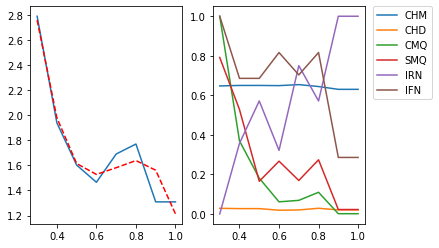

Max val resolution: 0.3



Metrics for jiangzongyao__kettle-master
Total classes: 70
Total controllers: 13
Open issues : 0
Stars : 24


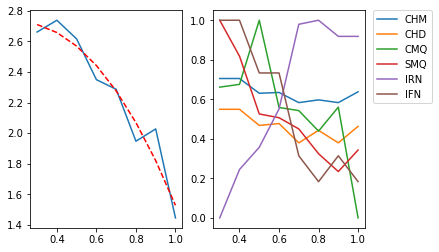

Max val resolution: 0.4



Metrics for khasang__delivery
Total classes: 218
Total controllers: 11
Open issues : 5
Stars : 6


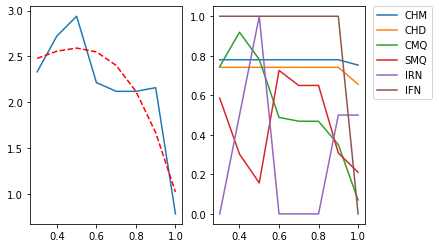

Max val resolution: 0.5



Metrics for suyeq__steamMall
Total classes: 120
Total controllers: 13
Open issues : 2
Stars : 8


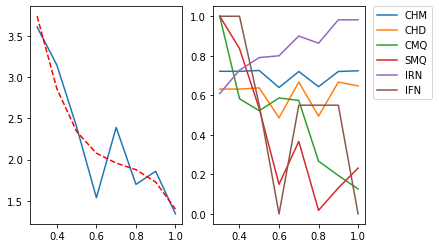

Max val resolution: 0.3



Metrics for fishstormX__fishmaple
Total classes: 173
Total controllers: 21
Open issues : 6
Stars : 11


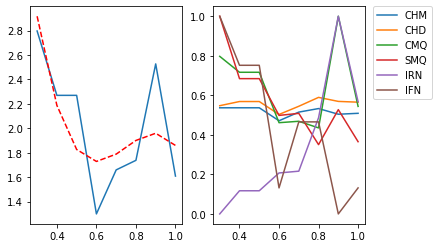

Max val resolution: 0.3



Metrics for lvr1997__ershoujiaoyi
Total classes: 78
Total controllers: 11
Open issues : 7
Stars : 14


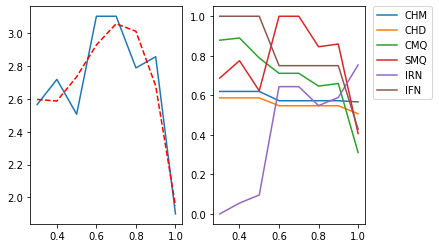

Max val resolution: 0.6



Metrics for vector1989__EMAS
Total classes: 265
Total controllers: 26
Open issues : 1
Stars : 9


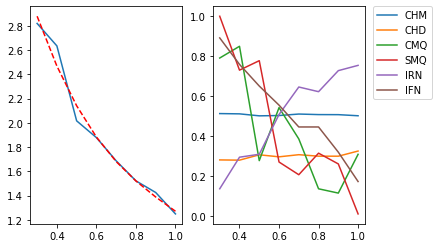

Max val resolution: 0.3



Metrics for dp2-g56__Dp2-L02
Total classes: 245
Total controllers: 40
Open issues : 0
Stars : 4


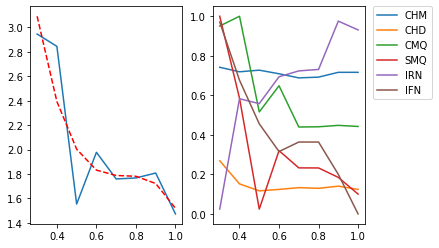

Max val resolution: 0.3



Metrics for ElectiveTeam__elective_system
Total classes: 97
Total controllers: 15
Open issues : 0
Stars : 4


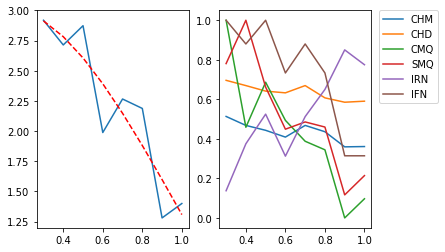

Max val resolution: 0.3



Metrics for qwe7783131__CareerDevelopment
Total classes: 193
Total controllers: 37
Open issues : 2
Stars : 2


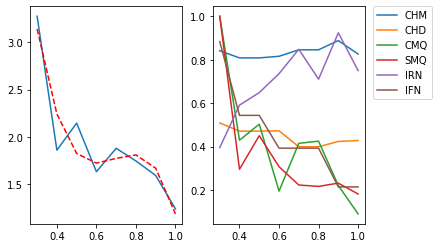

Max val resolution: 0.3



Metrics for fawks96__pet-hospital
Total classes: 74
Total controllers: 11
Open issues : 5
Stars : 2


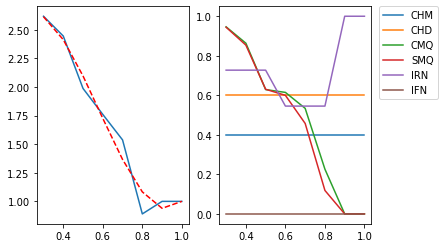

Max val resolution: 0.3



Metrics for qianqianjun__Educational-management
Total classes: 100
Total controllers: 20
Open issues : 3
Stars : 66


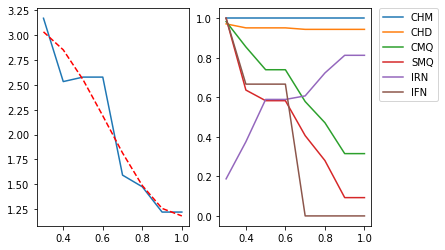

Max val resolution: 0.3



Metrics for Ryan--Yang__CBoard-boot
Total classes: 228
Total controllers: 15
Open issues : 2
Stars : 13


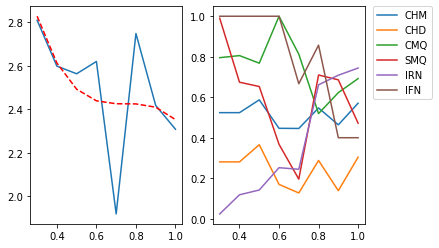

Max val resolution: 0.3



Metrics for MiniPa__cjs_ssms
Total classes: 98
Total controllers: 13
Open issues : 1
Stars : 11


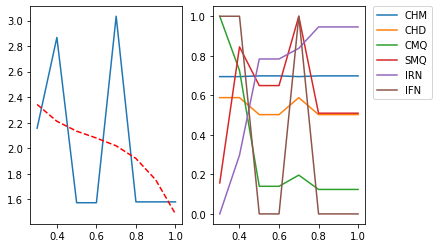

Max val resolution: 0.7



Metrics for flamefire33__uckefu
Total classes: 609
Total controllers: 75
Open issues : 0
Stars : 3


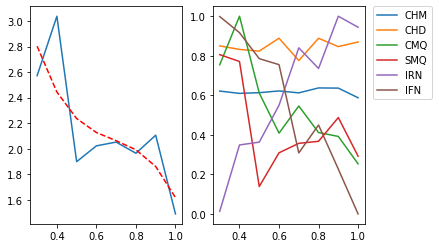

Max val resolution: 0.4



Metrics for moxiaohei__OPMS
Total classes: 130
Total controllers: 33
Open issues : 0
Stars : 3


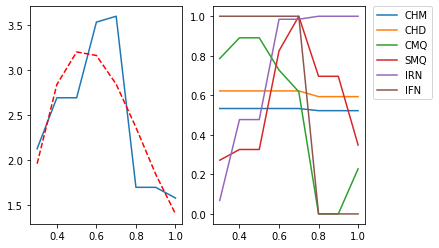

Max val resolution: 0.7



Metrics for Maxcj__Maxcj
Total classes: 177
Total controllers: 23
Open issues : 2
Stars : 2


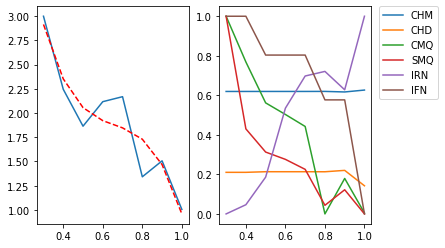

Max val resolution: 0.3



Metrics for RoyZeng__gmhx
Total classes: 402
Total controllers: 60
Open issues : 0
Stars : 2


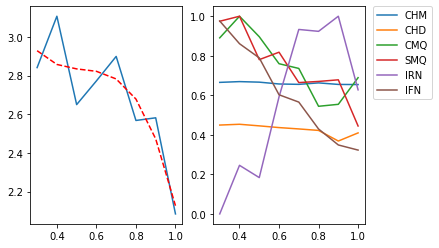

Max val resolution: 0.4



Metrics for jakarta99__iii-ee104
Total classes: 114
Total controllers: 36
Open issues : 0
Stars : 5


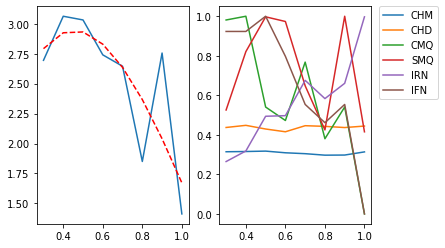

Max val resolution: 0.4



Metrics for nimble-platform__business-process-service
Total classes: 222
Total controllers: 47
Open issues : 16
Stars : 5


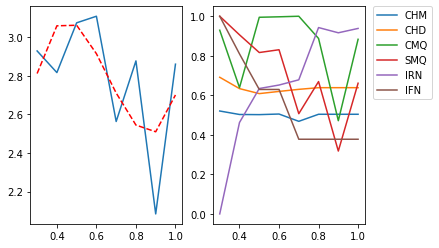

Max val resolution: 0.6



Metrics for SupermePower__zammc-manage
Total classes: 119
Total controllers: 18
Open issues : 0
Stars : 2


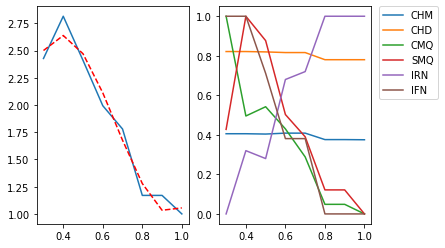

Max val resolution: 0.4



Metrics for BCSquad__pmph_java_front
Total classes: 369
Total controllers: 55
Open issues : 0
Stars : 9


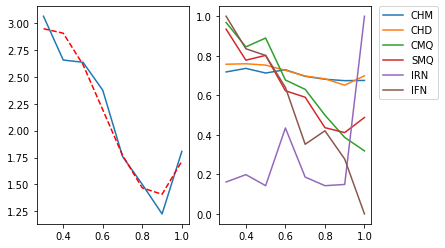

Max val resolution: 0.3



Metrics for c2s__telegram-bot-admin
Total classes: 138
Total controllers: 19
Open issues : 0
Stars : 3


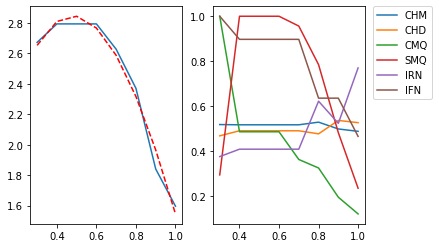

Max val resolution: 0.4



Metrics for findmyapp__findmyapp
Total classes: 139
Total controllers: 13
Open issues : 0
Stars : 2


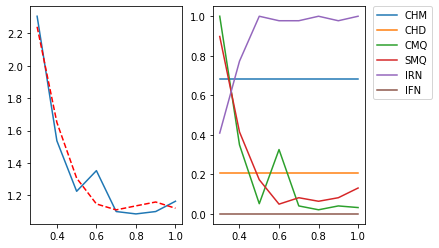

Max val resolution: 0.3



Metrics for codemky__uni
Total classes: 615
Total controllers: 89
Open issues : 2
Stars : 5


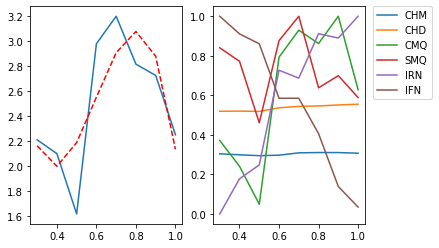

Max val resolution: 0.7



Metrics for danbaixidanbai__OCproject
Total classes: 77
Total controllers: 15
Open issues : 2
Stars : 3


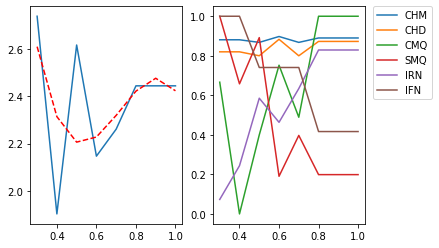

Max val resolution: 0.3



Metrics for justinbaby__my-paper
Total classes: 463
Total controllers: 100
Open issues : 0
Stars : 13


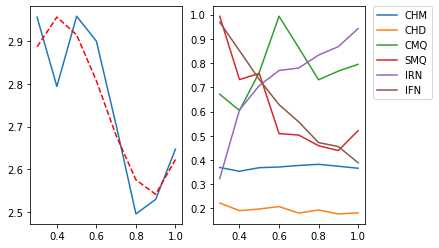

Max val resolution: 0.5



Metrics for nieyue__ActivationCodeMall
Total classes: 307
Total controllers: 41
Open issues : 0
Stars : 3


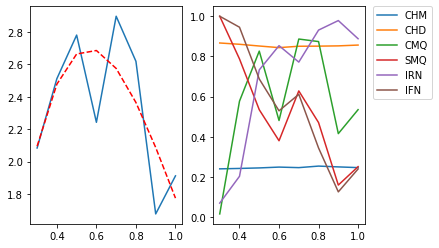

Max val resolution: 0.7



Metrics for justinscript__shopping.plat
Total classes: 298
Total controllers: 14
Open issues : 3
Stars : 39


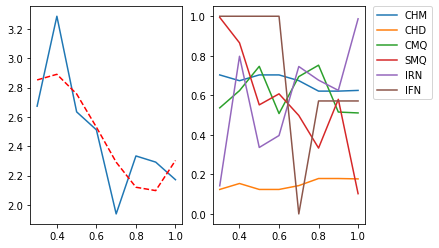

Max val resolution: 0.4



Metrics for wsk1103__movie-boot
Total classes: 217
Total controllers: 23
Open issues : 0
Stars : 60


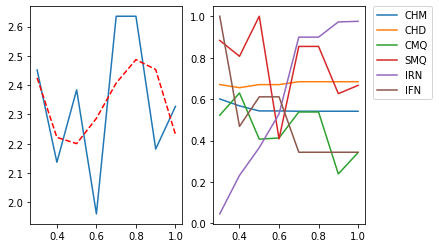

Max val resolution: 0.7



Metrics for cloudfoundry-attic__login-server
Total classes: 133
Total controllers: 23
Open issues : 3
Stars : 32


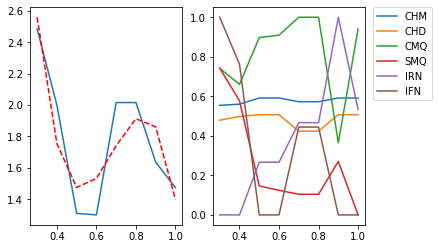

Max val resolution: 0.3



Metrics for zlren__noah-health
Total classes: 86
Total controllers: 12
Open issues : 0
Stars : 8


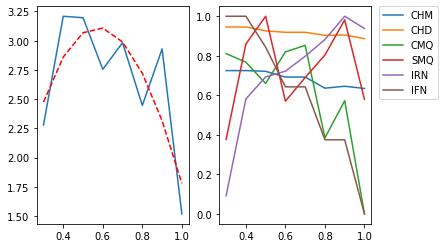

Max val resolution: 0.4



Metrics for scrumtracker__scrumtracker2017
Total classes: 44
Total controllers: 13
Open issues : 1
Stars : 3


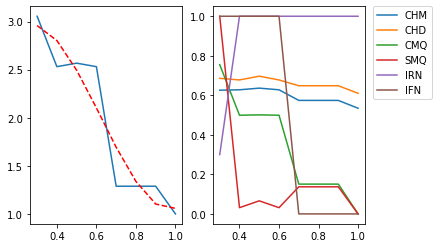

Max val resolution: 0.3



Metrics for longyzkd__wj-web-ext-enhancer
Total classes: 154
Total controllers: 64
Open issues : 0
Stars : 2


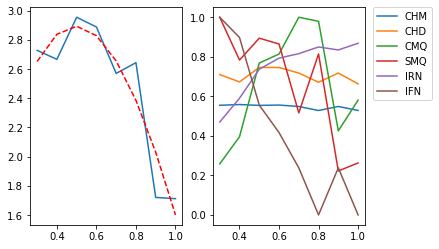

Max val resolution: 0.5



Metrics for GZzzhsmart__P2Pproj
Total classes: 275
Total controllers: 42
Open issues : 4
Stars : 13


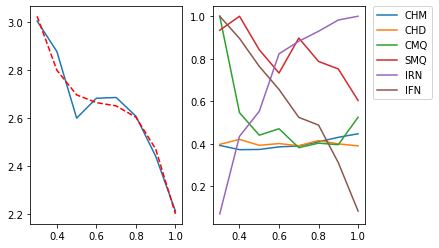

Max val resolution: 0.3



Metrics for joubin__CSC191
Total classes: 32
Total controllers: 15
Open issues : 5
Stars : 5


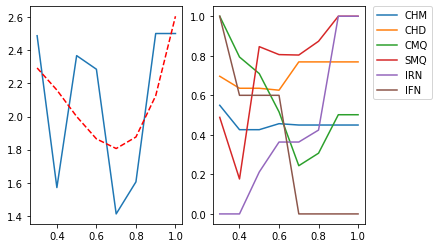

Max val resolution: 0.9



Metrics for Jannchie__biliob_backend
Total classes: 200
Total controllers: 22
Open issues : 4
Stars : 37


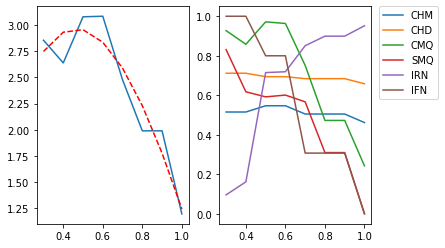

Max val resolution: 0.6



Metrics for VecJunZhi__NewZSWBEM
Total classes: 475
Total controllers: 61
Open issues : 0
Stars : 2


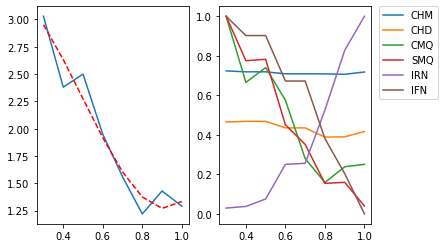

Max val resolution: 0.3



Metrics for surajcm__Poseidon
Total classes: 122
Total controllers: 31
Open issues : 3
Stars : 4


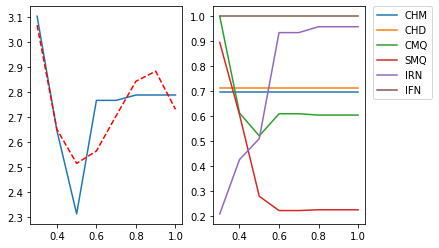

Max val resolution: 0.3



Metrics for kdirector1990__WeRPNetwork
Total classes: 116
Total controllers: 17
Open issues : 4
Stars : 2


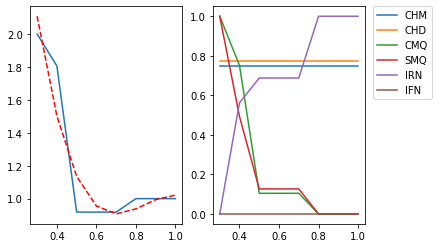

Max val resolution: 0.3



Metrics for INCF__eeg-database
Total classes: 1007
Total controllers: 84
Open issues : 32
Stars : 36


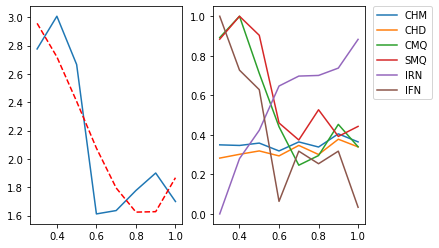

Max val resolution: 0.4



Metrics for cable5881__Fund
Total classes: 201
Total controllers: 17
Open issues : 0
Stars : 4


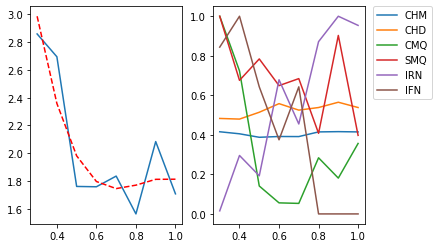

Max val resolution: 0.3



Metrics for metasfresh__metasfresh-webui-api-legacy
Total classes: 1081
Total controllers: 53
Open issues : 283
Stars : 30


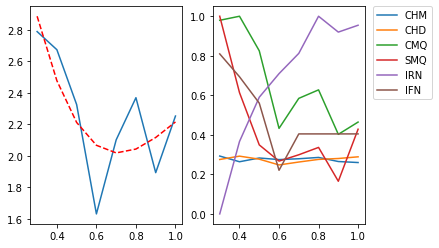

Max val resolution: 0.3



Metrics for tom1994__CEM
Total classes: 404
Total controllers: 48
Open issues : 0
Stars : 3


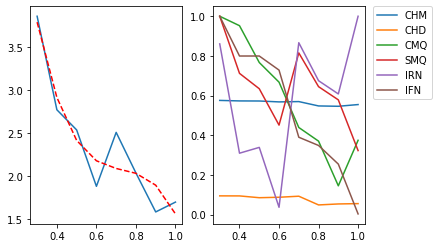

Max val resolution: 0.3



Metrics for krishagni__openspecimen
Total classes: 1244
Total controllers: 70
Open issues : 2
Stars : 41


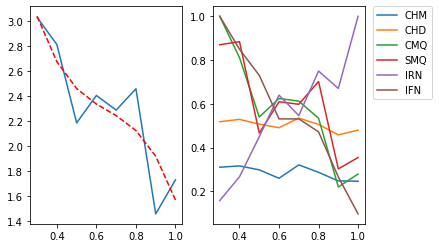

Max val resolution: 0.3



Metrics for YXG520__onlineExamSystem
Total classes: 41
Total controllers: 14
Open issues : 0
Stars : 2


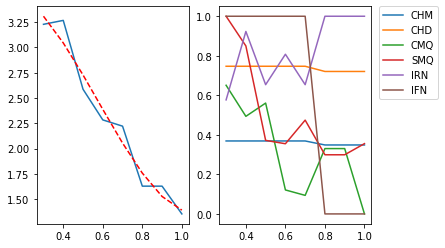

Max val resolution: 0.4



Metrics for hongqiang__shopb2b
Total classes: 465
Total controllers: 91
Open issues : 0
Stars : 2


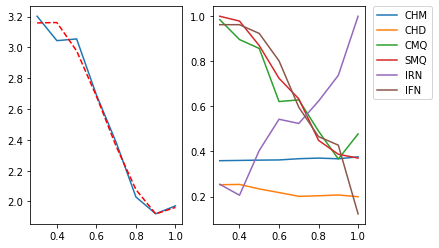

Max val resolution: 0.3



Metrics for shuxianfeng__movision
Total classes: 886
Total controllers: 80
Open issues : 0
Stars : 21


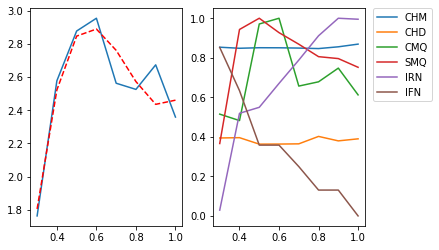

Max val resolution: 0.6



Metrics for FISHStack__FISH-UCKeFu
Total classes: 665
Total controllers: 84
Open issues : 0
Stars : 5


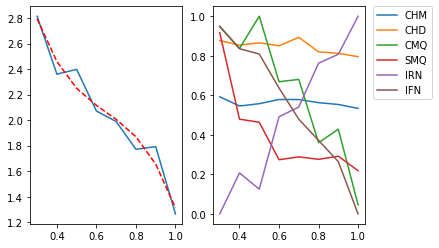

Max val resolution: 0.3



Metrics for wang007__live-server
Total classes: 238
Total controllers: 23
Open issues : 0
Stars : 6


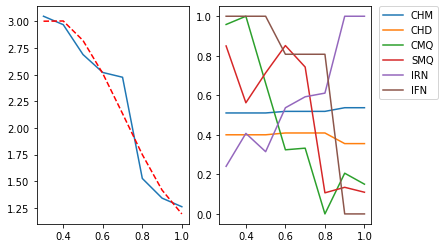

Max val resolution: 0.3



Metrics for crypto-coder__open-cyclos
Total classes: 2514
Total controllers: 1271
Open issues : 0
Stars : 4


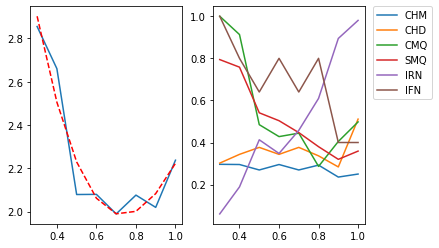

Max val resolution: 0.3



Metrics for KongZouXiang__TradeSteward
Total classes: 232
Total controllers: 40
Open issues : 1
Stars : 4


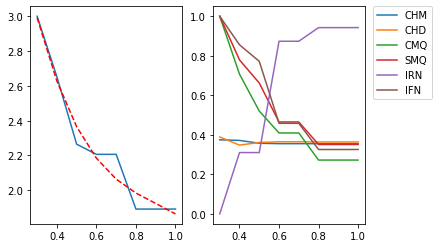

Max val resolution: 0.3



Metrics for uq-eresearch__oztrack
Total classes: 213
Total controllers: 57
Open issues : 43
Stars : 6


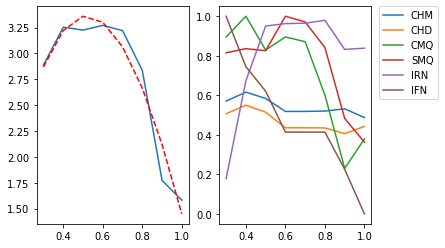

Max val resolution: 0.6



Metrics for 15005935651__Guns-Medical
Total classes: 178
Total controllers: 19
Open issues : 2
Stars : 15


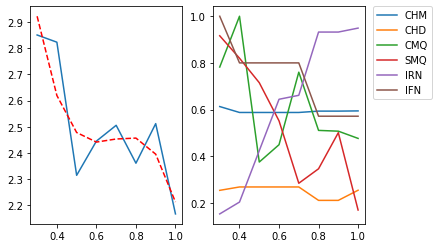

Max val resolution: 0.3



Metrics for AURIN__online-whatif
Total classes: 429
Total controllers: 22
Open issues : 2
Stars : 11


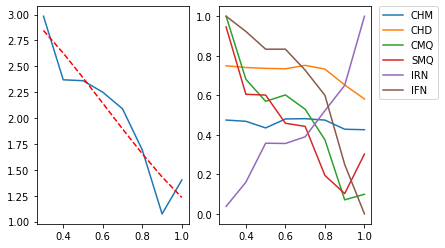

Max val resolution: 0.3



Metrics for purang-fintech__seppb
Total classes: 430
Total controllers: 45
Open issues : 1
Stars : 79


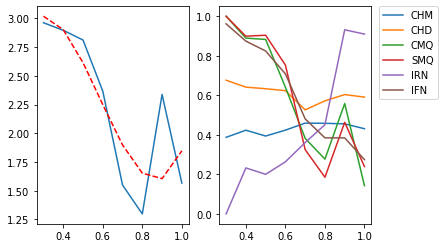

Max val resolution: 0.3



Metrics for CrazyZhao__zblog
Total classes: 63
Total controllers: 13
Open issues : 0
Stars : 3


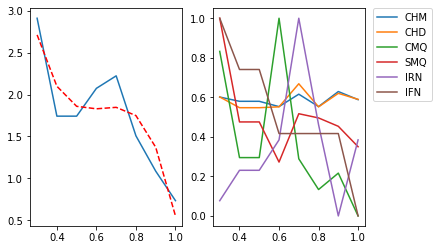

Max val resolution: 0.3



Metrics for eea__eionet.webq
Total classes: 196
Total controllers: 21
Open issues : 3
Stars : 2


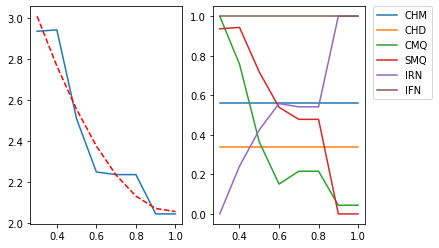

Max val resolution: 0.4



Metrics for isa-group__ideas-studio
Total classes: 115
Total controllers: 20
Open issues : 100
Stars : 3


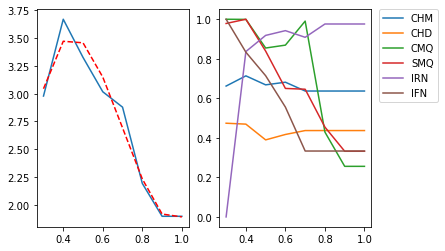

Max val resolution: 0.4



Metrics for lancelee98__PeopleMange
Total classes: 182
Total controllers: 22
Open issues : 0
Stars : 2


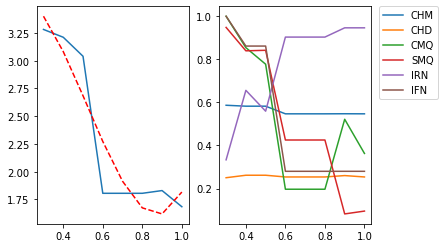

Max val resolution: 0.3



Metrics for qiemengyan__videoconfigserver
Total classes: 214
Total controllers: 27
Open issues : 2
Stars : 2


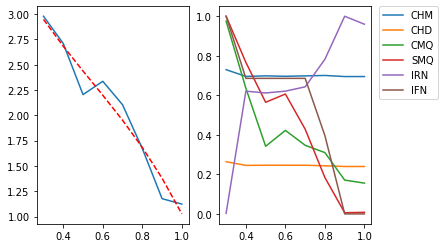

Max val resolution: 0.3



Metrics for hslooooooool__form_flow
Total classes: 467
Total controllers: 49
Open issues : 1
Stars : 15


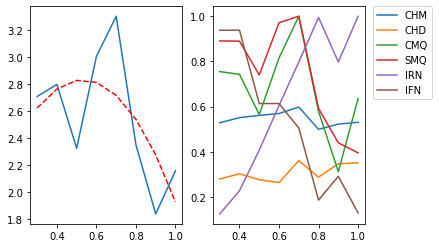

Max val resolution: 0.7



Metrics for justinscript__travel.b2b
Total classes: 515
Total controllers: 36
Open issues : 7
Stars : 51


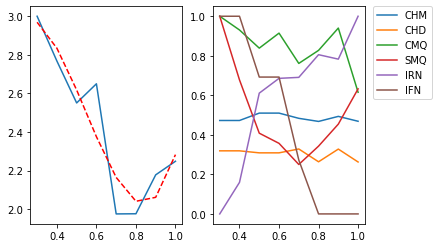

Max val resolution: 0.3



Metrics for dagilmore__Riddlin
Total classes: 51
Total controllers: 12
Open issues : 0
Stars : 4


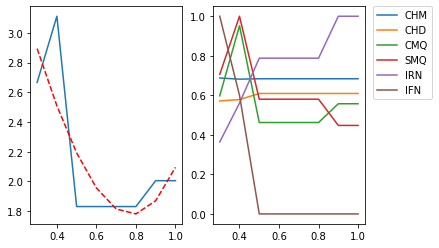

Max val resolution: 0.4



Metrics for finallysmile3__ExamSystem
Total classes: 108
Total controllers: 17
Open issues : 4
Stars : 33


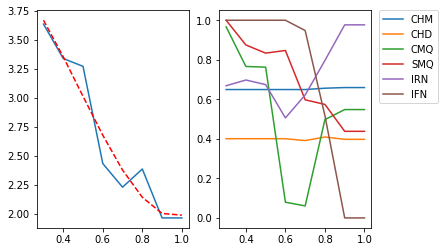

Max val resolution: 0.3



Metrics for zhangdaiscott__jeecg-nomaven
Total classes: 596
Total controllers: 99
Open issues : 0
Stars : 19


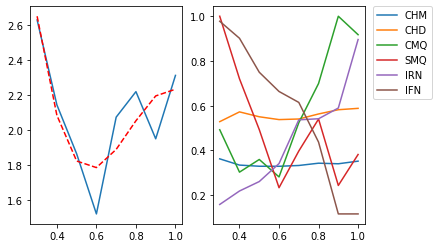

Max val resolution: 0.3



Metrics for 514840279__danyuan-application
Total classes: 277
Total controllers: 51
Open issues : 0
Stars : 46


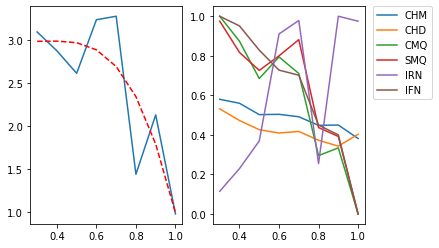

Max val resolution: 0.7



Metrics for Lab41__Dendrite
Total classes: 101
Total controllers: 17
Open issues : 18
Stars : 92


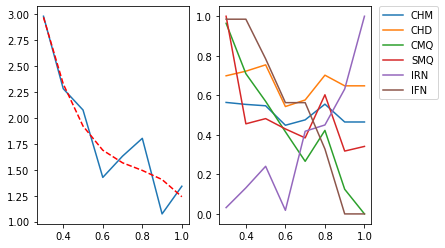

Max val resolution: 0.3



Metrics for sunxingtm__FPMS
Total classes: 721
Total controllers: 91
Open issues : 0
Stars : 4


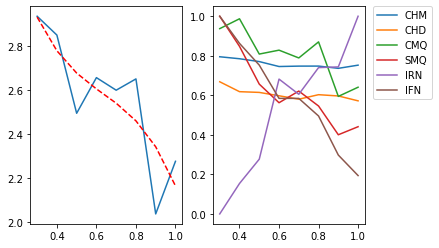

Max val resolution: 0.3



Metrics for uq-eresearch__lorestore
Total classes: 85
Total controllers: 11
Open issues : 12
Stars : 3


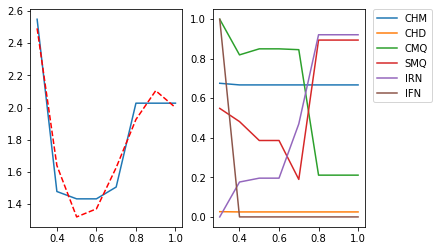

Max val resolution: 0.3



Metrics for dr-thomashartmann__phd-thesis
Total classes: 36
Total controllers: 13
Open issues : 0
Stars : 2


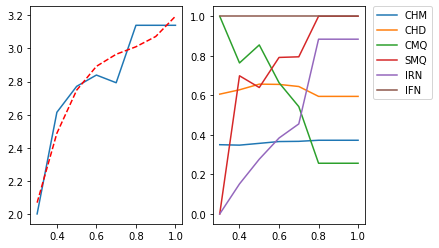

Max val resolution: 0.8



Metrics for shangtech__WeiXinPlatform
Total classes: 88
Total controllers: 38
Open issues : 0
Stars : 3


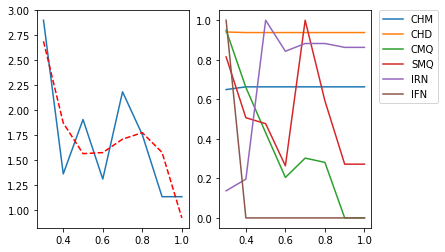

Max val resolution: 0.3



Metrics for HuangBear__TheaterProject
Total classes: 155
Total controllers: 17
Open issues : 2
Stars : 2


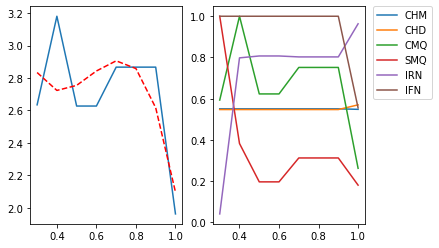

Max val resolution: 0.4



Metrics for 398907877__AppPortal
Total classes: 470
Total controllers: 77
Open issues : 0
Stars : 2


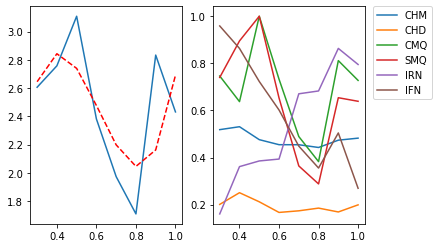

Max val resolution: 0.5



Metrics for yunchaoyun__active4j-flow
Total classes: 219
Total controllers: 47
Open issues : 0
Stars : 9


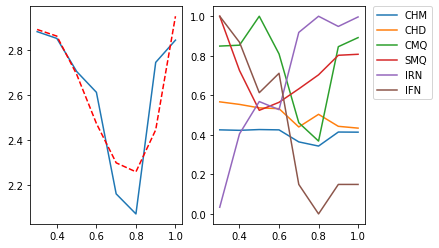

Max val resolution: 0.3



Metrics for zhouweiwei18__HospitalSystem
Total classes: 210
Total controllers: 29
Open issues : 5
Stars : 3


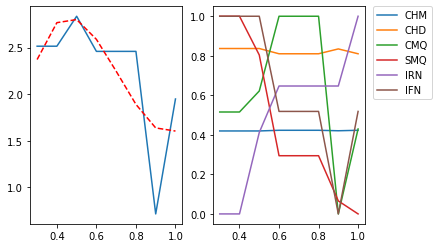

Max val resolution: 0.5



Metrics for parkkyoung__f4mall
Total classes: 59
Total controllers: 15
Open issues : 0
Stars : 4


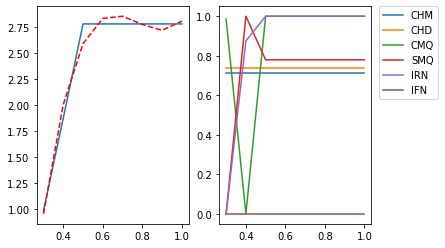

Max val resolution: 0.5



Metrics for ushahidi__SwiftRiver-API
Total classes: 249
Total controllers: 21
Open issues : 18
Stars : 5


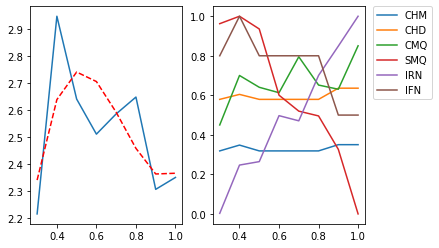

Max val resolution: 0.4



Metrics for edgexfoundry__core-data
Total classes: 38
Total controllers: 15
Open issues : 0
Stars : 12


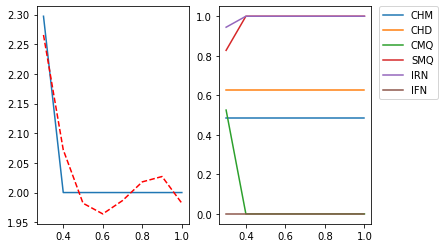

Max val resolution: 0.3



Metrics for mofadeyunduo__online-judge
Total classes: 43
Total controllers: 16
Open issues : 0
Stars : 12


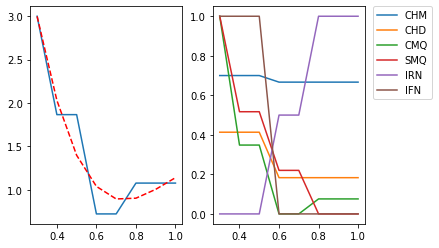

Max val resolution: 0.3



Metrics for atlasapi__atlas
Total classes: 1797
Total controllers: 69
Open issues : 23
Stars : 32


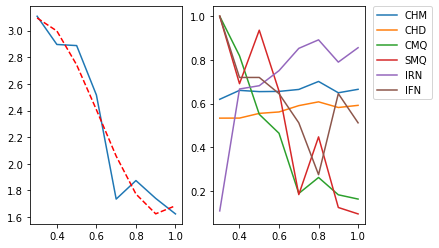

Max val resolution: 0.3



Metrics for yorkmass__Yark-AdminMS
Total classes: 69
Total controllers: 12
Open issues : 1
Stars : 9


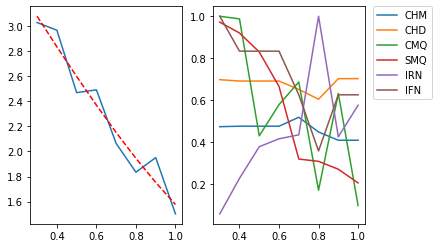

Max val resolution: 0.3



Metrics for MaritimeConnectivityPlatform__IdentityRegistry
Total classes: 124
Total controllers: 24
Open issues : 0
Stars : 10


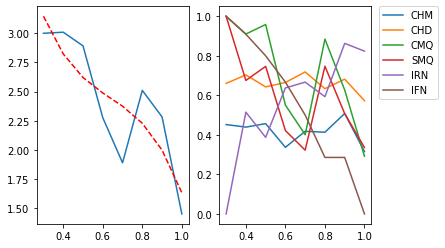

Max val resolution: 0.4



Metrics for jlu-linshuhang__goods-master
Total classes: 87
Total controllers: 12
Open issues : 0
Stars : 3


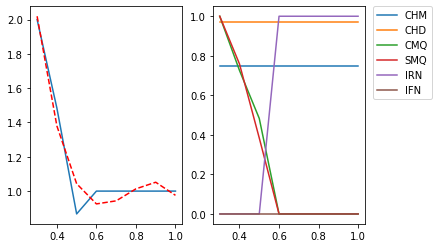

Max val resolution: 0.3



Metrics for OHDSI__ArachneCentralAPI
Total classes: 832
Total controllers: 64
Open issues : 7
Stars : 4


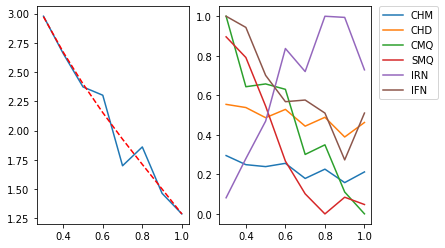

Max val resolution: 0.3



Metrics for momoplan__dataanalysis
Total classes: 195
Total controllers: 20
Open issues : 0
Stars : 3


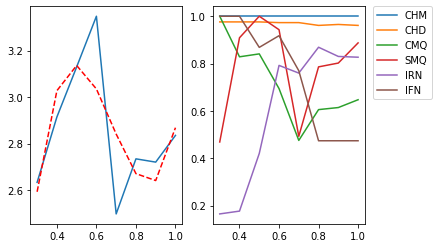

Max val resolution: 0.6



Metrics for orgqy88cckz__AccumulationFund
Total classes: 134
Total controllers: 28
Open issues : 0
Stars : 3


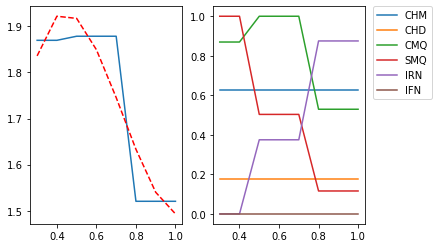

Max val resolution: 0.5



Metrics for aramsoft__aramcomp
Total classes: 345
Total controllers: 72
Open issues : 1
Stars : 5


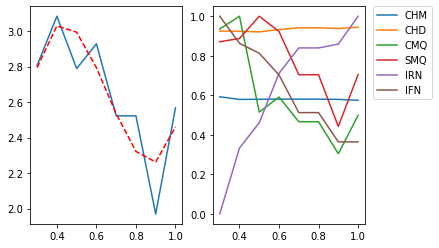

Max val resolution: 0.4


In [8]:
import re


projects_data = pd.read_csv('merged_data.csv')

# Plot metrics
# Read all csv
total = 0
csvs = []
dir = '.'
for cur, directories, files in os.walk(dir):
    if cur == dir: # Current directory only
        for f in files:
            if 'csv' in f and 'merged_data' not in f:
                total += 1
                csvs.append(f)

executed_projects = set()
for f in csvs:
    try:
        project_name = re.split(r'_\d', f)[0]
        if project_name in executed_projects:
            continue
        executed_projects.add(project_name)
        project_data = projects_data[projects_data.name.eq(project_name.replace('__','/'))]
        print(f"\n\n\nMetrics for {project_name}")
        print(f"Total classes: {project_data.classes.item()}")
        print(f"Stars : {project_data.stars.item()}")
        print(f"Open issues : {project_data.open_issues.item()}")
        
        

        df = read_csv(f)
        df = normalize_data(df)
        df = adjust_values(df)
        df = calculate_total(df)
        df = choose_best_iteration_for_resolution(df)
        plot(df)
        print(f"Max val resolution: {df.loc[df['TOTAL'].idxmax()].RESOLUTION}")
    except KeyError as e:
        print(f"KeyError on {project_name}")
        
# projects_data[projects_data.name.eq('AnonymousCyberWarrior/guoan_interface_1.0')]



In [11]:
# Identify projects and histogram
projects = {re.split(r'_\d', p)[0] for p in set(next(os.walk('/home/mbrito/git/thesis/data/metrics_backup'))[2]) if 'csv' in p and 'merged' not in p}
projects_data = pd.read_csv('merged_data.csv')

print(len(csvs))                
for f in csvs:
    try:
        project_name = re.split(r'_\d', f)[0]
    except TypeError as e:
        print(f"[ERROR] Failed for project: {project_name}") # should only happen for other csvs in the folder other than metrics

projects = {p.replace('__', '/') for p in projects}
final_projects = set()
drop_indexes = []

# Identify and remove the projects that did not get executed due to parser complications (projects that did not compile or had other issues)
for index, row in projects_data.iterrows():
    if row['name'] not in projects:        
        drop_indexes.append(index)
    else:
        final_projects.add(row['name'])

projects_data = projects_data.drop(projects_data.index[drop_indexes]).reset_index(drop=True)
        

# Filter out the top 10% outliers
# q = projects_data["classes"].quantile(0.9)
# projects_hist = projects_data.loc[(projects_data.classes < q)]


205


[ 30 105 180 255 330 405 480 555 630 705 780]
30 105
105 180
180 255
255 330
330 405
405 480
480 555
555 630
630 705
705 780


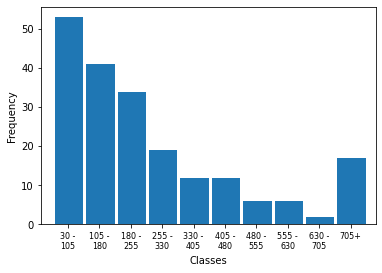

In [13]:
# Histogram
ran = np.arange(30,800,75)
#ran = np.append(ran, [2600])
print(ran)
#plt.hist(projects_data['classes'], bins=ran, align='left',rwidth=0.8, color='steelblue')
_, bins, patches = plt.hist(np.clip(projects_data['classes'], ran[0], ran[-1]), bins=ran, rwidth=0.9)

labels = []
it = iter(list(ran))
min = next(it)
for max in it:
    print(f"{min} {max}")    
    labels.append(f"{min} -\n{max}")
    min = max

    


xlabels = bins[1:].astype(str)
xlabels[-1] += '+'

labels = labels[:-1]
labels.append('705+')

rans_2 = [r + 35 for r in ran]
plt.xticks(rans_2, labels, fontsize=8)
plt.ylabel('Frequency')
plt.xlabel('Classes', labelpad=5)
plt.xlim([0, 800])


plt.savefig('new_histogram.png')
plt.show()

Class range 0 - 150 - 80 applications


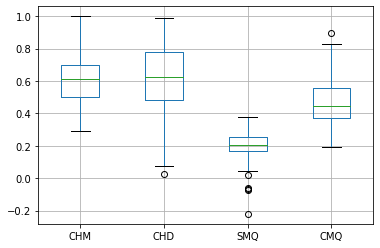

Class range 150 - 300 - 60 applications


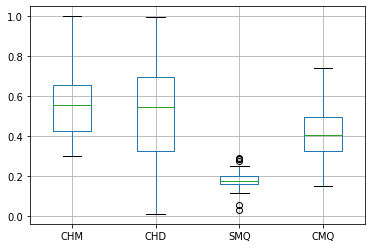

Class range 300 - 450 - 22 applications


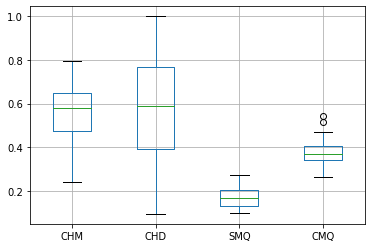

Class range 450 - 600 - 17 applications


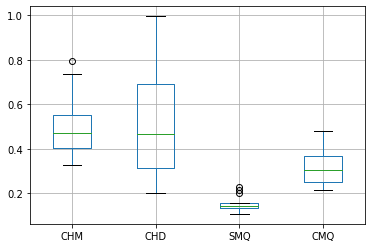

Class range 600 - 750 - 8 applications


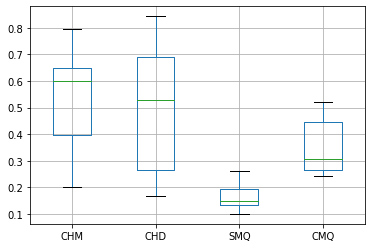

Class range 750 - 900 - 6 applications


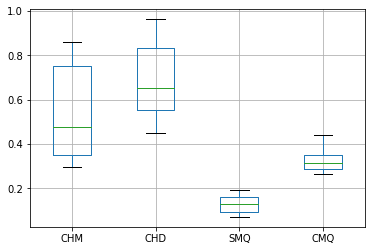

Class range 900 - 1000 - 3 applications


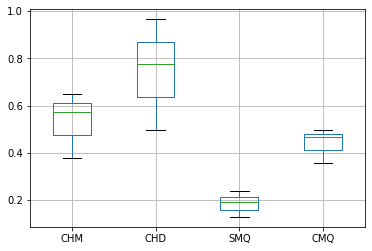

Class range 1000 - 10000 - 6 applications


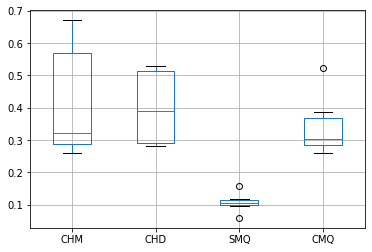

Overall boxplot


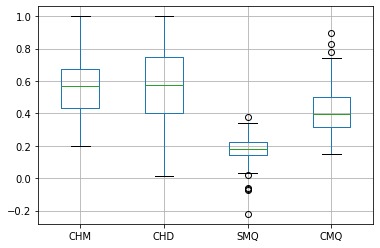

In [14]:
metrics = {re.split(r'_\d', p)[0] : p for p in set(next(os.walk('/home/mbrito/git/thesis/data/metrics'))[2]) if 'csv' in p and 'merged' not in p}
def copy_items(df_dst, index, df_src, labels):
    for l in labels:
        df_dst.loc[index, l] = df_src[l].item()
        
for index, row in projects_data.iterrows():
    name = row['name'].replace('/', '__')
    if name in metrics:
        df = read_csv(f"/home/mbrito/git/thesis/data/metrics/{metrics[name]}")
        df_temp = df.copy()
        df_temp = normalize_data(df_temp)
        df_temp = adjust_values(df_temp)
        
        df_temp = calculate_total(df_temp)
        df_temp = choose_best_iteration_for_resolution(df_temp)
        
        df_best = df_temp.sort_values('TOTAL', ascending=False)[0:1]
        copy_items(projects_data, index, df.iloc[df_best.index.item()], ['RESOLUTION', 'CHM', 'CHD', 'IRN', 'IFN', 'OPN', 'CMQ', 'SMQ', 'SERVICES'])
        
# projects_data merged with metrics 
def get_df_in_range(min, max):
    return projects_data[(projects_data['classes'] > min) & (projects_data['classes'] <= max)].sort_values('classes', ascending=False)

# Create the actual groups
ran = np.arange(0,1001, 150)
ran = np.append(ran, [1000,10000])

it = iter(list(ran))
mi = next(it)
df_groups = []
for ma in it:
    #print(f"{mi} {ma}")
    df_group = get_df_in_range(mi, ma)
    df_groups.append(([mi,ma], df_group))
    mi = ma


    

for ran, df in df_groups:
    print(f"Class range {ran[0]} - {ran[1]} - {len(df)} applications")
    df.boxplot(column=['CHM', 'CHD', 'SMQ', 'CMQ'])
    plt.show()
    
projects_data.sort_values('SMQ')

print(f"Overall boxplot")
projects_data.boxplot(column=['CHM', 'CHD', 'SMQ', 'CMQ'])
plt.savefig('boxplot.png')



In [ ]:
projects_data[pd.isnull(projects_data).any(axis=1)]

In [17]:
projects_data.to_csv('final_project_data.csv', index=False)

In [ ]:
projects_data.boxplot(column=['IFN'])
plt.savefig('boxplot_ifn.png')
